# Practice Lab: Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [38]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

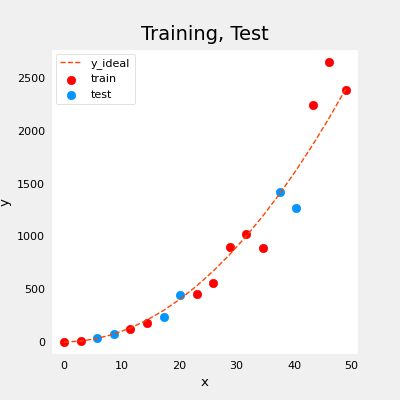

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    
    for i in range(m):
        err_i = ( (yhat[i] - y[i])**2 )
        err += err_i
    
    err = err / (2 * m)
    
    return(err)

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

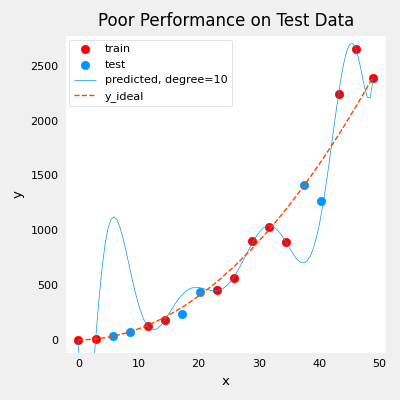

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

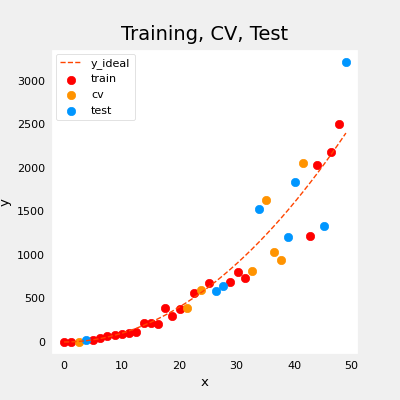

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):

    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    
    y_pred[:,degree] = lmodel.predict(x)

optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

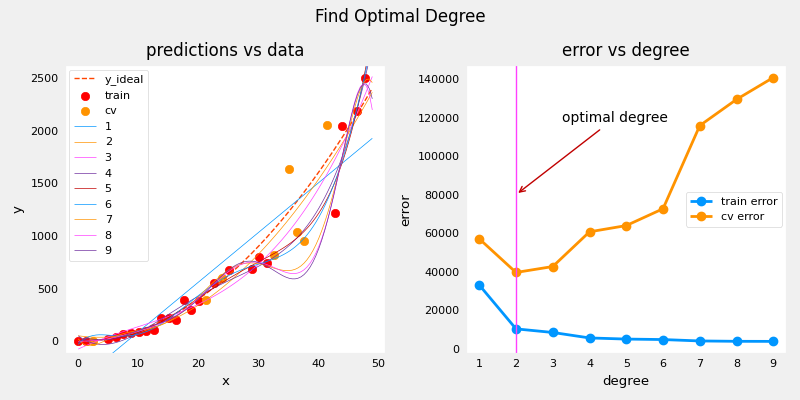

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

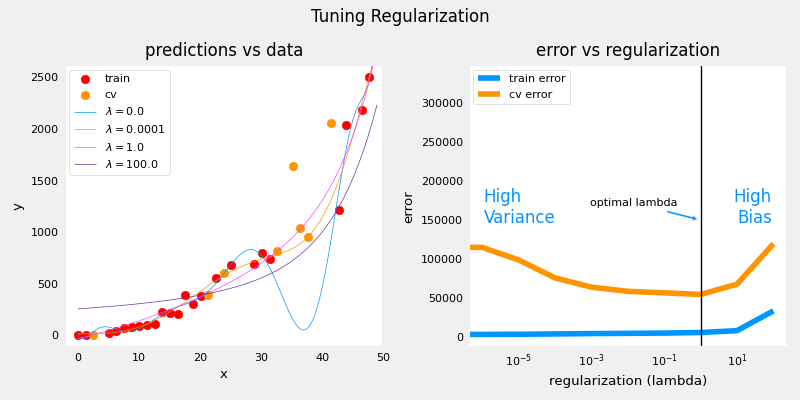

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

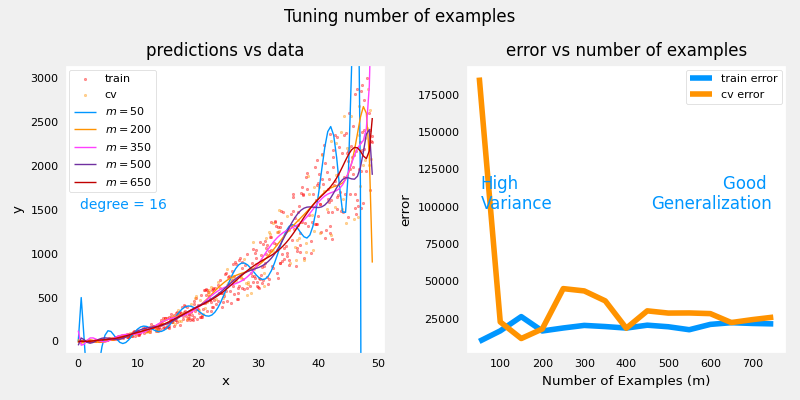

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


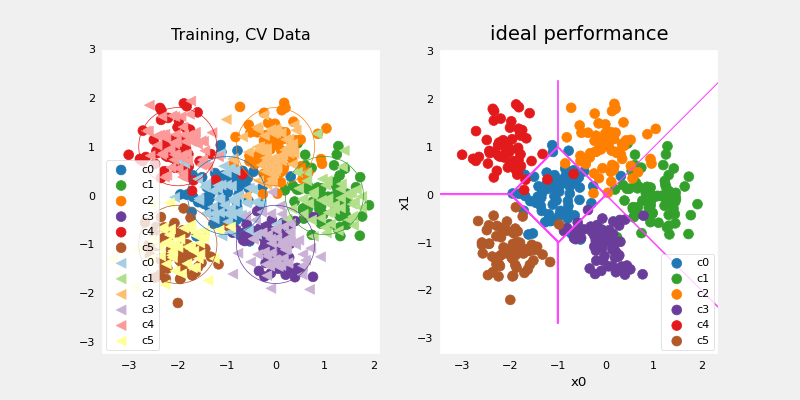

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [18]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    
    for i in range(m):
        if yhat[i] != y[i]:
            incorrect += 1
    
    cerr = incorrect / m
    
    return(cerr)

In [19]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [39]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


tf.random.set_seed(1234)
model = Sequential(
    [Dense(120, activation='relu', name="Layer_1"),
     Dense(40, activation='relu', name="Layer_2"),
     Dense(6, activation='linear', name="Activation_layer")], name="Complex")


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01))

In [21]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 928us/step - loss: 1.0045
Epoch 2/1000
13/13 [==============================] - 0s 722us/step - loss: 0.3925
Epoch 3/1000
13/13 [==============================] - 0s 704us/step - loss: 0.3305
Epoch 4/1000
13/13 [==============================] - 0s 670us/step - loss: 0.2766
Epoch 5/1000
13/13 [==============================] - 0s 712us/step - loss: 0.2621
Epoch 6/1000
13/13 [==============================] - 0s 691us/step - loss: 0.2812
Epoch 7/1000
13/13 [==============================] - 0s 698us/step - loss: 0.2533
Epoch 8/1000
13/13 [==============================] - 0s 679us/step - loss: 0.2299
Epoch 9/1000
13/13 [==============================] - 0s 627us/step - loss: 0.2249
Epoch 10/1000
13/13 [==============================] - 0s 632us/step - loss: 0.2150
Epoch 11/1000
13/13 [==============================] - 0s 668us/step - loss: 0.2160
Epoch 12/1000
13/13 [==============================] - 0s 616us/step - loss: 0.2121
E

13/13 [==============================] - 0s 601us/step - loss: 0.1852
Epoch 99/1000
13/13 [==============================] - 0s 603us/step - loss: 0.1876
Epoch 100/1000
13/13 [==============================] - 0s 603us/step - loss: 0.1606
Epoch 101/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1760
Epoch 102/1000
13/13 [==============================] - 0s 626us/step - loss: 0.1631
Epoch 103/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1836
Epoch 104/1000
13/13 [==============================] - 0s 609us/step - loss: 0.1656
Epoch 105/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1522
Epoch 106/1000
13/13 [==============================] - 0s 625us/step - loss: 0.1525
Epoch 107/1000
13/13 [==============================] - 0s 606us/step - loss: 0.1717
Epoch 108/1000
13/13 [==============================] - 0s 622us/step - loss: 0.1491
Epoch 109/1000
13/13 [==============================] - 0s 630us/step - loss: 0.1

13/13 [==============================] - 0s 622us/step - loss: 0.1025
Epoch 195/1000
13/13 [==============================] - 0s 650us/step - loss: 0.1010
Epoch 196/1000
13/13 [==============================] - 0s 638us/step - loss: 0.0965
Epoch 197/1000
13/13 [==============================] - 0s 637us/step - loss: 0.1182
Epoch 198/1000
13/13 [==============================] - 0s 650us/step - loss: 0.1228
Epoch 199/1000
13/13 [==============================] - 0s 656us/step - loss: 0.1125
Epoch 200/1000
13/13 [==============================] - 0s 648us/step - loss: 0.1210
Epoch 201/1000
13/13 [==============================] - 0s 662us/step - loss: 0.0994
Epoch 202/1000
13/13 [==============================] - 0s 668us/step - loss: 0.1072
Epoch 203/1000
13/13 [==============================] - 0s 650us/step - loss: 0.1021
Epoch 204/1000
13/13 [==============================] - 0s 616us/step - loss: 0.1367
Epoch 205/1000
13/13 [==============================] - 0s 632us/step - loss: 0.

13/13 [==============================] - 0s 626us/step - loss: 0.0788
Epoch 291/1000
13/13 [==============================] - 0s 619us/step - loss: 0.0683
Epoch 292/1000
13/13 [==============================] - 0s 644us/step - loss: 0.0792
Epoch 293/1000
13/13 [==============================] - 0s 625us/step - loss: 0.0724
Epoch 294/1000
13/13 [==============================] - 0s 626us/step - loss: 0.0742
Epoch 295/1000
13/13 [==============================] - 0s 595us/step - loss: 0.0787
Epoch 296/1000
13/13 [==============================] - 0s 608us/step - loss: 0.1106
Epoch 297/1000
13/13 [==============================] - 0s 609us/step - loss: 0.0853
Epoch 298/1000
13/13 [==============================] - 0s 604us/step - loss: 0.0847
Epoch 299/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0666
Epoch 300/1000
13/13 [==============================] - 0s 625us/step - loss: 0.0801
Epoch 301/1000
13/13 [==============================] - 0s 649us/step - loss: 0.

13/13 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 387/1000
13/13 [==============================] - 0s 791us/step - loss: 0.0653
Epoch 388/1000
13/13 [==============================] - 0s 623us/step - loss: 0.0859
Epoch 389/1000
13/13 [==============================] - 0s 661us/step - loss: 0.0671
Epoch 390/1000
13/13 [==============================] - 0s 652us/step - loss: 0.1068
Epoch 391/1000
13/13 [==============================] - 0s 651us/step - loss: 0.0709
Epoch 392/1000
13/13 [==============================] - 0s 669us/step - loss: 0.0727
Epoch 393/1000
13/13 [==============================] - 0s 606us/step - loss: 0.0601
Epoch 394/1000
13/13 [==============================] - 0s 644us/step - loss: 0.0584
Epoch 395/1000
13/13 [==============================] - 0s 615us/step - loss: 0.0919
Epoch 396/1000
13/13 [==============================] - 0s 651us/step - loss: 0.0831
Epoch 397/1000
13/13 [==============================] - 0s 626us/step - loss: 0.07

13/13 [==============================] - 0s 653us/step - loss: 0.0922
Epoch 483/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1158
Epoch 484/1000
13/13 [==============================] - 0s 618us/step - loss: 0.0828
Epoch 485/1000
13/13 [==============================] - 0s 596us/step - loss: 0.0722
Epoch 486/1000
13/13 [==============================] - 0s 597us/step - loss: 0.0800
Epoch 487/1000
13/13 [==============================] - 0s 614us/step - loss: 0.0655
Epoch 488/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0501
Epoch 489/1000
13/13 [==============================] - 0s 677us/step - loss: 0.0526
Epoch 490/1000
13/13 [==============================] - 0s 595us/step - loss: 0.0421
Epoch 491/1000
13/13 [==============================] - 0s 682us/step - loss: 0.0357
Epoch 492/1000
13/13 [==============================] - 0s 617us/step - loss: 0.0415
Epoch 493/1000
13/13 [==============================] - 0s 642us/step - loss: 0.

13/13 [==============================] - 0s 702us/step - loss: 0.0845
Epoch 579/1000
13/13 [==============================] - 0s 634us/step - loss: 0.0498
Epoch 580/1000
13/13 [==============================] - 0s 651us/step - loss: 0.0607
Epoch 581/1000
13/13 [==============================] - 0s 647us/step - loss: 0.0488
Epoch 582/1000
13/13 [==============================] - 0s 607us/step - loss: 0.0484
Epoch 583/1000
13/13 [==============================] - 0s 692us/step - loss: 0.0564
Epoch 584/1000
13/13 [==============================] - 0s 596us/step - loss: 0.0504
Epoch 585/1000
13/13 [==============================] - 0s 672us/step - loss: 0.0418
Epoch 586/1000
13/13 [==============================] - 0s 628us/step - loss: 0.0410
Epoch 587/1000
13/13 [==============================] - 0s 646us/step - loss: 0.0400
Epoch 588/1000
13/13 [==============================] - 0s 655us/step - loss: 0.0423
Epoch 589/1000
13/13 [==============================] - 0s 591us/step - loss: 0.

13/13 [==============================] - 0s 616us/step - loss: 0.0363
Epoch 675/1000
13/13 [==============================] - 0s 622us/step - loss: 0.0314
Epoch 676/1000
13/13 [==============================] - 0s 611us/step - loss: 0.0358
Epoch 677/1000
13/13 [==============================] - 0s 616us/step - loss: 0.0449
Epoch 678/1000
13/13 [==============================] - 0s 620us/step - loss: 0.0630
Epoch 679/1000
13/13 [==============================] - 0s 660us/step - loss: 0.0322
Epoch 680/1000
13/13 [==============================] - 0s 617us/step - loss: 0.0397
Epoch 681/1000
13/13 [==============================] - 0s 672us/step - loss: 0.0584
Epoch 682/1000
13/13 [==============================] - 0s 614us/step - loss: 0.0539
Epoch 683/1000
13/13 [==============================] - 0s 632us/step - loss: 0.0644
Epoch 684/1000
13/13 [==============================] - 0s 635us/step - loss: 0.0646
Epoch 685/1000
13/13 [==============================] - 0s 635us/step - loss: 0.

13/13 [==============================] - 0s 643us/step - loss: 0.0482
Epoch 771/1000
13/13 [==============================] - 0s 645us/step - loss: 0.0465
Epoch 772/1000
13/13 [==============================] - 0s 674us/step - loss: 0.0276
Epoch 773/1000
13/13 [==============================] - 0s 632us/step - loss: 0.0312
Epoch 774/1000
13/13 [==============================] - 0s 680us/step - loss: 0.0264
Epoch 775/1000
13/13 [==============================] - 0s 655us/step - loss: 0.0236
Epoch 776/1000
13/13 [==============================] - 0s 639us/step - loss: 0.0305
Epoch 777/1000
13/13 [==============================] - 0s 650us/step - loss: 0.0224
Epoch 778/1000
13/13 [==============================] - 0s 598us/step - loss: 0.0226
Epoch 779/1000
13/13 [==============================] - 0s 651us/step - loss: 0.0232
Epoch 780/1000
13/13 [==============================] - 0s 594us/step - loss: 0.0266
Epoch 781/1000
13/13 [==============================] - 0s 656us/step - loss: 0.

13/13 [==============================] - 0s 639us/step - loss: 0.0168
Epoch 867/1000
13/13 [==============================] - 0s 603us/step - loss: 0.0186
Epoch 868/1000
13/13 [==============================] - 0s 639us/step - loss: 0.0185
Epoch 869/1000
13/13 [==============================] - 0s 604us/step - loss: 0.0209
Epoch 870/1000
13/13 [==============================] - 0s 677us/step - loss: 0.0282
Epoch 871/1000
13/13 [==============================] - 0s 588us/step - loss: 0.0179
Epoch 872/1000
13/13 [==============================] - 0s 651us/step - loss: 0.0184
Epoch 873/1000
13/13 [==============================] - 0s 650us/step - loss: 0.0192
Epoch 874/1000
13/13 [==============================] - 0s 624us/step - loss: 0.0196
Epoch 875/1000
13/13 [==============================] - 0s 670us/step - loss: 0.0255
Epoch 876/1000
13/13 [==============================] - 0s 604us/step - loss: 0.0217
Epoch 877/1000
13/13 [==============================] - 0s 688us/step - loss: 0.

13/13 [==============================] - 0s 608us/step - loss: 0.0205
Epoch 963/1000
13/13 [==============================] - 0s 605us/step - loss: 0.0316
Epoch 964/1000
13/13 [==============================] - 0s 611us/step - loss: 0.0222
Epoch 965/1000
13/13 [==============================] - 0s 608us/step - loss: 0.0518
Epoch 966/1000
13/13 [==============================] - 0s 616us/step - loss: 0.0552
Epoch 967/1000
13/13 [==============================] - 0s 611us/step - loss: 0.1024
Epoch 968/1000
13/13 [==============================] - 0s 600us/step - loss: 0.0889
Epoch 969/1000
13/13 [==============================] - 0s 626us/step - loss: 0.0454
Epoch 970/1000
13/13 [==============================] - 0s 603us/step - loss: 0.0555
Epoch 971/1000
13/13 [==============================] - 0s 612us/step - loss: 0.0304
Epoch 972/1000
13/13 [==============================] - 0s 611us/step - loss: 0.0265
Epoch 973/1000
13/13 [==============================] - 0s 612us/step - loss: 0.

In [22]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 120)               360       
                                                                 
 Layer_2 (Dense)             (None, 40)                4840      
                                                                 
 Activation_layer (Dense)    (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 0s 390us/step


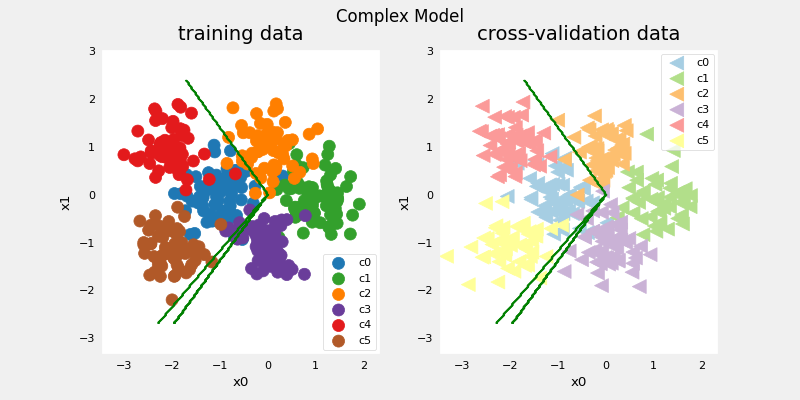

In [40]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [24]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 574us/step
categorization error, training, complex model: 0.007
categorization error, cv,       complex model: 0.119


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [25]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [Dense(6, activation="relu", name="Layer_1"),
     Dense(6, activation="linear", name="Activation_layer")], name = "Simple")

model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01))


In [26]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 727us/step - loss: 1.8053
Epoch 2/1000
13/13 [==============================] - 0s 584us/step - loss: 1.5311
Epoch 3/1000
13/13 [==============================] - 0s 563us/step - loss: 1.3329
Epoch 4/1000
13/13 [==============================] - 0s 566us/step - loss: 1.1537
Epoch 5/1000
13/13 [==============================] - 0s 542us/step - loss: 1.0019
Epoch 6/1000
13/13 [==============================] - 0s 570us/step - loss: 0.8761
Epoch 7/1000
13/13 [==============================] - 0s 565us/step - loss: 0.7731
Epoch 8/1000
13/13 [==============================] - 0s 559us/step - loss: 0.6839
Epoch 9/1000
13/13 [==============================] - 0s 506us/step - loss: 0.6066
Epoch 10/1000
13/13 [==============================] - 0s 518us/step - loss: 0.5395
Epoch 11/1000
13/13 [==============================] - 0s 495us/step - loss: 0.4845
Epoch 12/1000
13/13 [==============================] - 0s 541us/step - loss: 0.4438
E

13/13 [==============================] - 0s 560us/step - loss: 0.2078
Epoch 99/1000
13/13 [==============================] - 0s 528us/step - loss: 0.2021
Epoch 100/1000
13/13 [==============================] - 0s 546us/step - loss: 0.2051
Epoch 101/1000
13/13 [==============================] - 0s 526us/step - loss: 0.2046
Epoch 102/1000
13/13 [==============================] - 0s 522us/step - loss: 0.2054
Epoch 103/1000
13/13 [==============================] - 0s 511us/step - loss: 0.2079
Epoch 104/1000
13/13 [==============================] - 0s 524us/step - loss: 0.2030
Epoch 105/1000
13/13 [==============================] - 0s 529us/step - loss: 0.2014
Epoch 106/1000
13/13 [==============================] - 0s 524us/step - loss: 0.2024
Epoch 107/1000
13/13 [==============================] - 0s 528us/step - loss: 0.2011
Epoch 108/1000
13/13 [==============================] - 0s 534us/step - loss: 0.2012
Epoch 109/1000
13/13 [==============================] - 0s 531us/step - loss: 0.2

13/13 [==============================] - 0s 541us/step - loss: 0.1978
Epoch 195/1000
13/13 [==============================] - 0s 574us/step - loss: 0.1980
Epoch 196/1000
13/13 [==============================] - 0s 533us/step - loss: 0.1982
Epoch 197/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1991
Epoch 198/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2005
Epoch 199/1000
13/13 [==============================] - 0s 551us/step - loss: 0.2028
Epoch 200/1000
13/13 [==============================] - 0s 521us/step - loss: 0.1990
Epoch 201/1000
13/13 [==============================] - 0s 551us/step - loss: 0.1988
Epoch 202/1000
13/13 [==============================] - 0s 539us/step - loss: 0.1971
Epoch 203/1000
13/13 [==============================] - 0s 588us/step - loss: 0.1980
Epoch 204/1000
13/13 [==============================] - 0s 535us/step - loss: 0.1993
Epoch 205/1000
13/13 [==============================] - 0s 592us/step - loss: 0.

13/13 [==============================] - 0s 516us/step - loss: 0.1973
Epoch 291/1000
13/13 [==============================] - 0s 505us/step - loss: 0.1965
Epoch 292/1000
13/13 [==============================] - 0s 526us/step - loss: 0.1964
Epoch 293/1000
13/13 [==============================] - 0s 506us/step - loss: 0.1973
Epoch 294/1000
13/13 [==============================] - 0s 504us/step - loss: 0.1951
Epoch 295/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2030
Epoch 296/1000
13/13 [==============================] - 0s 505us/step - loss: 0.1965
Epoch 297/1000
13/13 [==============================] - 0s 503us/step - loss: 0.2012
Epoch 298/1000
13/13 [==============================] - 0s 503us/step - loss: 0.1989
Epoch 299/1000
13/13 [==============================] - 0s 505us/step - loss: 0.1969
Epoch 300/1000
13/13 [==============================] - 0s 501us/step - loss: 0.1979
Epoch 301/1000
13/13 [==============================] - 0s 543us/step - loss: 0.

13/13 [==============================] - 0s 547us/step - loss: 0.1949
Epoch 387/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1934
Epoch 388/1000
13/13 [==============================] - 0s 551us/step - loss: 0.1978
Epoch 389/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1974
Epoch 390/1000
13/13 [==============================] - 0s 554us/step - loss: 0.1951
Epoch 391/1000
13/13 [==============================] - 0s 550us/step - loss: 0.1940
Epoch 392/1000
13/13 [==============================] - 0s 518us/step - loss: 0.1940
Epoch 393/1000
13/13 [==============================] - 0s 524us/step - loss: 0.1928
Epoch 394/1000
13/13 [==============================] - 0s 570us/step - loss: 0.1933
Epoch 395/1000
13/13 [==============================] - 0s 556us/step - loss: 0.1929
Epoch 396/1000
13/13 [==============================] - 0s 528us/step - loss: 0.1978
Epoch 397/1000
13/13 [==============================] - 0s 538us/step - loss: 0.

13/13 [==============================] - 0s 535us/step - loss: 0.1947
Epoch 483/1000
13/13 [==============================] - 0s 545us/step - loss: 0.1953
Epoch 484/1000
13/13 [==============================] - 0s 627us/step - loss: 0.1943
Epoch 485/1000
13/13 [==============================] - 0s 651us/step - loss: 0.1956
Epoch 486/1000
13/13 [==============================] - 0s 600us/step - loss: 0.1929
Epoch 487/1000
13/13 [==============================] - 0s 614us/step - loss: 0.1937
Epoch 488/1000
13/13 [==============================] - 0s 695us/step - loss: 0.1942
Epoch 489/1000
13/13 [==============================] - 0s 652us/step - loss: 0.1939
Epoch 490/1000
13/13 [==============================] - 0s 678us/step - loss: 0.1992
Epoch 491/1000
13/13 [==============================] - 0s 622us/step - loss: 0.1955
Epoch 492/1000
13/13 [==============================] - 0s 622us/step - loss: 0.1933
Epoch 493/1000
13/13 [==============================] - 0s 603us/step - loss: 0.

13/13 [==============================] - 0s 597us/step - loss: 0.1939
Epoch 579/1000
13/13 [==============================] - 0s 564us/step - loss: 0.1919
Epoch 580/1000
13/13 [==============================] - 0s 550us/step - loss: 0.1943
Epoch 581/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1936
Epoch 582/1000
13/13 [==============================] - 0s 600us/step - loss: 0.1912
Epoch 583/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1914
Epoch 584/1000
13/13 [==============================] - 0s 584us/step - loss: 0.1943
Epoch 585/1000
13/13 [==============================] - 0s 563us/step - loss: 0.1905
Epoch 586/1000
13/13 [==============================] - 0s 575us/step - loss: 0.1920
Epoch 587/1000
13/13 [==============================] - 0s 554us/step - loss: 0.1932
Epoch 588/1000
13/13 [==============================] - 0s 554us/step - loss: 0.1917
Epoch 589/1000
13/13 [==============================] - 0s 543us/step - loss: 0.

13/13 [==============================] - 0s 566us/step - loss: 0.1942
Epoch 675/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1910
Epoch 676/1000
13/13 [==============================] - 0s 565us/step - loss: 0.1928
Epoch 677/1000
13/13 [==============================] - 0s 556us/step - loss: 0.1928
Epoch 678/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1924
Epoch 679/1000
13/13 [==============================] - 0s 561us/step - loss: 0.1995
Epoch 680/1000
13/13 [==============================] - 0s 578us/step - loss: 0.1920
Epoch 681/1000
13/13 [==============================] - 0s 555us/step - loss: 0.1908
Epoch 682/1000
13/13 [==============================] - 0s 553us/step - loss: 0.1917
Epoch 683/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1968
Epoch 684/1000
13/13 [==============================] - 0s 610us/step - loss: 0.1915
Epoch 685/1000
13/13 [==============================] - 0s 570us/step - loss: 0.

13/13 [==============================] - 0s 535us/step - loss: 0.1903
Epoch 771/1000
13/13 [==============================] - 0s 521us/step - loss: 0.1926
Epoch 772/1000
13/13 [==============================] - 0s 532us/step - loss: 0.1921
Epoch 773/1000
13/13 [==============================] - 0s 510us/step - loss: 0.1912
Epoch 774/1000
13/13 [==============================] - 0s 522us/step - loss: 0.1932
Epoch 775/1000
13/13 [==============================] - 0s 518us/step - loss: 0.1920
Epoch 776/1000
13/13 [==============================] - 0s 529us/step - loss: 0.1900
Epoch 777/1000
13/13 [==============================] - 0s 573us/step - loss: 0.1927
Epoch 778/1000
13/13 [==============================] - 0s 593us/step - loss: 0.1911
Epoch 779/1000
13/13 [==============================] - 0s 565us/step - loss: 0.1939
Epoch 780/1000
13/13 [==============================] - 0s 556us/step - loss: 0.1973
Epoch 781/1000
13/13 [==============================] - 0s 560us/step - loss: 0.

13/13 [==============================] - 0s 561us/step - loss: 0.1937
Epoch 867/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1903
Epoch 868/1000
13/13 [==============================] - 0s 587us/step - loss: 0.1955
Epoch 869/1000
13/13 [==============================] - 0s 577us/step - loss: 0.1893
Epoch 870/1000
13/13 [==============================] - 0s 633us/step - loss: 0.1929
Epoch 871/1000
13/13 [==============================] - 0s 539us/step - loss: 0.1903
Epoch 872/1000
13/13 [==============================] - 0s 665us/step - loss: 0.1914
Epoch 873/1000
13/13 [==============================] - 0s 616us/step - loss: 0.1922
Epoch 874/1000
13/13 [==============================] - 0s 785us/step - loss: 0.1905
Epoch 875/1000
13/13 [==============================] - 0s 645us/step - loss: 0.1905
Epoch 876/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1911
Epoch 877/1000
13/13 [==============================] - 0s 607us/step - loss: 0.

13/13 [==============================] - 0s 573us/step - loss: 0.1909
Epoch 963/1000
13/13 [==============================] - 0s 536us/step - loss: 0.1975
Epoch 964/1000
13/13 [==============================] - 0s 548us/step - loss: 0.1897
Epoch 965/1000
13/13 [==============================] - 0s 529us/step - loss: 0.1937
Epoch 966/1000
13/13 [==============================] - 0s 529us/step - loss: 0.1889
Epoch 967/1000
13/13 [==============================] - 0s 539us/step - loss: 0.1907
Epoch 968/1000
13/13 [==============================] - 0s 526us/step - loss: 0.1916
Epoch 969/1000
13/13 [==============================] - 0s 529us/step - loss: 0.1925
Epoch 970/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1897
Epoch 971/1000
13/13 [==============================] - 0s 530us/step - loss: 0.1895
Epoch 972/1000
13/13 [==============================] - 0s 556us/step - loss: 0.1900
Epoch 973/1000
13/13 [==============================] - 0s 535us/step - loss: 0.

In [27]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 6)                 18        
                                                                 
 Activation_layer (Dense)    (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 0s 346us/step


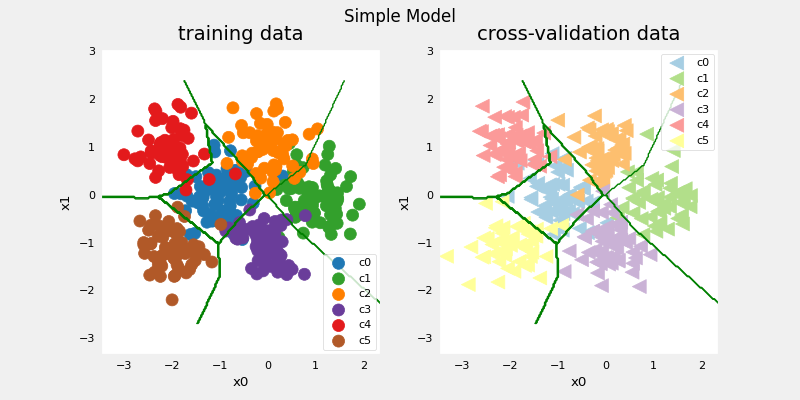

In [28]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [29]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 563us/step
categorization error, training, simple model, 0.068, complex model: 0.007
categorization error, cv,       simple model, 0.056, complex model: 0.119


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [30]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="Layer_1"),
     Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="Layer_2"),
     Dense(6, activation='linear', name="Activation_layer")], name="Complex")

model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01))


In [31]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 965us/step - loss: 4.4562
Epoch 2/1000
13/13 [==============================] - 0s 782us/step - loss: 1.6773
Epoch 3/1000
13/13 [==============================] - 0s 803us/step - loss: 1.3118
Epoch 4/1000
13/13 [==============================] - 0s 791us/step - loss: 1.0627
Epoch 5/1000
13/13 [==============================] - 0s 729us/step - loss: 0.9725
Epoch 6/1000
13/13 [==============================] - 0s 767us/step - loss: 0.9390
Epoch 7/1000
13/13 [==============================] - 0s 764us/step - loss: 0.9133
Epoch 8/1000
13/13 [==============================] - 0s 695us/step - loss: 0.8688
Epoch 9/1000
13/13 [==============================] - 0s 669us/step - loss: 0.8019
Epoch 10/1000
13/13 [==============================] - 0s 664us/step - loss: 0.7659
Epoch 11/1000
13/13 [==============================] - 0s 722us/step - loss: 0.7515
Epoch 12/1000
13/13 [==============================] - 0s 727us/step - loss: 0.7520
E

13/13 [==============================] - 0s 617us/step - loss: 0.4710
Epoch 99/1000
13/13 [==============================] - 0s 648us/step - loss: 0.5065
Epoch 100/1000
13/13 [==============================] - 0s 665us/step - loss: 0.5050
Epoch 101/1000
13/13 [==============================] - 0s 649us/step - loss: 0.4935
Epoch 102/1000
13/13 [==============================] - 0s 658us/step - loss: 0.4783
Epoch 103/1000
13/13 [==============================] - 0s 617us/step - loss: 0.4758
Epoch 104/1000
13/13 [==============================] - 0s 659us/step - loss: 0.4640
Epoch 105/1000
13/13 [==============================] - 0s 636us/step - loss: 0.5134
Epoch 106/1000
13/13 [==============================] - 0s 657us/step - loss: 0.4910
Epoch 107/1000
13/13 [==============================] - 0s 663us/step - loss: 0.4715
Epoch 108/1000
13/13 [==============================] - 0s 623us/step - loss: 0.4748
Epoch 109/1000
13/13 [==============================] - 0s 664us/step - loss: 0.4

13/13 [==============================] - 0s 672us/step - loss: 0.4208
Epoch 195/1000
13/13 [==============================] - 0s 631us/step - loss: 0.4070
Epoch 196/1000
13/13 [==============================] - 0s 679us/step - loss: 0.3994
Epoch 197/1000
13/13 [==============================] - 0s 655us/step - loss: 0.4231
Epoch 198/1000
13/13 [==============================] - 0s 646us/step - loss: 0.3982
Epoch 199/1000
13/13 [==============================] - 0s 647us/step - loss: 0.4098
Epoch 200/1000
13/13 [==============================] - 0s 656us/step - loss: 0.4092
Epoch 201/1000
13/13 [==============================] - 0s 662us/step - loss: 0.4328
Epoch 202/1000
13/13 [==============================] - 0s 622us/step - loss: 0.3991
Epoch 203/1000
13/13 [==============================] - 0s 658us/step - loss: 0.4033
Epoch 204/1000
13/13 [==============================] - 0s 643us/step - loss: 0.4104
Epoch 205/1000
13/13 [==============================] - 0s 653us/step - loss: 0.

13/13 [==============================] - 0s 623us/step - loss: 0.3880
Epoch 291/1000
13/13 [==============================] - 0s 666us/step - loss: 0.3900
Epoch 292/1000
13/13 [==============================] - 0s 622us/step - loss: 0.3678
Epoch 293/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3765
Epoch 294/1000
13/13 [==============================] - 0s 628us/step - loss: 0.3965
Epoch 295/1000
13/13 [==============================] - 0s 643us/step - loss: 0.4118
Epoch 296/1000
13/13 [==============================] - 0s 638us/step - loss: 0.3796
Epoch 297/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3870
Epoch 298/1000
13/13 [==============================] - 0s 729us/step - loss: 0.3919
Epoch 299/1000
13/13 [==============================] - 0s 632us/step - loss: 0.3909
Epoch 300/1000
13/13 [==============================] - 0s 652us/step - loss: 0.4244
Epoch 301/1000
13/13 [==============================] - 0s 667us/step - loss: 0.

13/13 [==============================] - 0s 678us/step - loss: 0.3564
Epoch 387/1000
13/13 [==============================] - 0s 737us/step - loss: 0.3743
Epoch 388/1000
13/13 [==============================] - 0s 649us/step - loss: 0.3701
Epoch 389/1000
13/13 [==============================] - 0s 651us/step - loss: 0.3651
Epoch 390/1000
13/13 [==============================] - 0s 643us/step - loss: 0.3512
Epoch 391/1000
13/13 [==============================] - 0s 634us/step - loss: 0.3650
Epoch 392/1000
13/13 [==============================] - 0s 692us/step - loss: 0.3805
Epoch 393/1000
13/13 [==============================] - 0s 661us/step - loss: 0.3593
Epoch 394/1000
13/13 [==============================] - 0s 655us/step - loss: 0.3624
Epoch 395/1000
13/13 [==============================] - 0s 663us/step - loss: 0.3912
Epoch 396/1000
13/13 [==============================] - 0s 622us/step - loss: 0.3811
Epoch 397/1000
13/13 [==============================] - 0s 681us/step - loss: 0.

13/13 [==============================] - 0s 653us/step - loss: 0.3745
Epoch 483/1000
13/13 [==============================] - 0s 627us/step - loss: 0.3791
Epoch 484/1000
13/13 [==============================] - 0s 655us/step - loss: 0.3738
Epoch 485/1000
13/13 [==============================] - 0s 648us/step - loss: 0.3821
Epoch 486/1000
13/13 [==============================] - 0s 609us/step - loss: 0.3555
Epoch 487/1000
13/13 [==============================] - 0s 657us/step - loss: 0.3449
Epoch 488/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3511
Epoch 489/1000
13/13 [==============================] - 0s 644us/step - loss: 0.3380
Epoch 490/1000
13/13 [==============================] - 0s 632us/step - loss: 0.3538
Epoch 491/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3691
Epoch 492/1000
13/13 [==============================] - 0s 642us/step - loss: 0.3689
Epoch 493/1000
13/13 [==============================] - 0s 617us/step - loss: 0.

13/13 [==============================] - 0s 592us/step - loss: 0.4200
Epoch 579/1000
13/13 [==============================] - 0s 644us/step - loss: 0.3565
Epoch 580/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3349
Epoch 581/1000
13/13 [==============================] - 0s 634us/step - loss: 0.3604
Epoch 582/1000
13/13 [==============================] - 0s 609us/step - loss: 0.3505
Epoch 583/1000
13/13 [==============================] - 0s 621us/step - loss: 0.3526
Epoch 584/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3750
Epoch 585/1000
13/13 [==============================] - 0s 640us/step - loss: 0.3880
Epoch 586/1000
13/13 [==============================] - 0s 634us/step - loss: 0.3615
Epoch 587/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3492
Epoch 588/1000
13/13 [==============================] - 0s 646us/step - loss: 0.3368
Epoch 589/1000
13/13 [==============================] - 0s 606us/step - loss: 0.

13/13 [==============================] - 0s 592us/step - loss: 0.4016
Epoch 675/1000
13/13 [==============================] - 0s 670us/step - loss: 0.3402
Epoch 676/1000
13/13 [==============================] - 0s 651us/step - loss: 0.3397
Epoch 677/1000
13/13 [==============================] - 0s 674us/step - loss: 0.3341
Epoch 678/1000
13/13 [==============================] - 0s 694us/step - loss: 0.3299
Epoch 679/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3422
Epoch 680/1000
13/13 [==============================] - 0s 699us/step - loss: 0.3374
Epoch 681/1000
13/13 [==============================] - 0s 619us/step - loss: 0.3529
Epoch 682/1000
13/13 [==============================] - 0s 673us/step - loss: 0.3392
Epoch 683/1000
13/13 [==============================] - 0s 631us/step - loss: 0.3358
Epoch 684/1000
13/13 [==============================] - 0s 622us/step - loss: 0.3475
Epoch 685/1000
13/13 [==============================] - 0s 710us/step - loss: 0.

13/13 [==============================] - 0s 651us/step - loss: 0.3336
Epoch 771/1000
13/13 [==============================] - 0s 611us/step - loss: 0.3485
Epoch 772/1000
13/13 [==============================] - 0s 663us/step - loss: 0.3447
Epoch 773/1000
13/13 [==============================] - 0s 610us/step - loss: 0.3767
Epoch 774/1000
13/13 [==============================] - 0s 672us/step - loss: 0.3762
Epoch 775/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3399
Epoch 776/1000
13/13 [==============================] - 0s 638us/step - loss: 0.3844
Epoch 777/1000
13/13 [==============================] - 0s 623us/step - loss: 0.3659
Epoch 778/1000
13/13 [==============================] - 0s 617us/step - loss: 0.3248
Epoch 779/1000
13/13 [==============================] - 0s 660us/step - loss: 0.3321
Epoch 780/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3422
Epoch 781/1000
13/13 [==============================] - 0s 629us/step - loss: 0.

13/13 [==============================] - 0s 690us/step - loss: 0.3764
Epoch 867/1000
13/13 [==============================] - 0s 632us/step - loss: 0.3336
Epoch 868/1000
13/13 [==============================] - 0s 651us/step - loss: 0.3321
Epoch 869/1000
13/13 [==============================] - 0s 649us/step - loss: 0.3406
Epoch 870/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3652
Epoch 871/1000
13/13 [==============================] - 0s 665us/step - loss: 0.3438
Epoch 872/1000
13/13 [==============================] - 0s 614us/step - loss: 0.3322
Epoch 873/1000
13/13 [==============================] - 0s 663us/step - loss: 0.3289
Epoch 874/1000
13/13 [==============================] - 0s 663us/step - loss: 0.3429
Epoch 875/1000
13/13 [==============================] - 0s 643us/step - loss: 0.3343
Epoch 876/1000
13/13 [==============================] - 0s 649us/step - loss: 0.3337
Epoch 877/1000
13/13 [==============================] - 0s 604us/step - loss: 0.

13/13 [==============================] - 0s 668us/step - loss: 0.3213
Epoch 963/1000
13/13 [==============================] - 0s 685us/step - loss: 0.3379
Epoch 964/1000
13/13 [==============================] - 0s 667us/step - loss: 0.3197
Epoch 965/1000
13/13 [==============================] - 0s 634us/step - loss: 0.3199
Epoch 966/1000
13/13 [==============================] - 0s 684us/step - loss: 0.3332
Epoch 967/1000
13/13 [==============================] - 0s 629us/step - loss: 0.3280
Epoch 968/1000
13/13 [==============================] - 0s 646us/step - loss: 0.3320
Epoch 969/1000
13/13 [==============================] - 0s 634us/step - loss: 0.3595
Epoch 970/1000
13/13 [==============================] - 0s 647us/step - loss: 0.3593
Epoch 971/1000
13/13 [==============================] - 0s 689us/step - loss: 0.3449
Epoch 972/1000
13/13 [==============================] - 0s 646us/step - loss: 0.3241
Epoch 973/1000
13/13 [==============================] - 0s 686us/step - loss: 0.

In [32]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 120)               360       
                                                                 
 Layer_2 (Dense)             (None, 40)                4840      
                                                                 
 Activation_layer (Dense)    (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 0s 386us/step


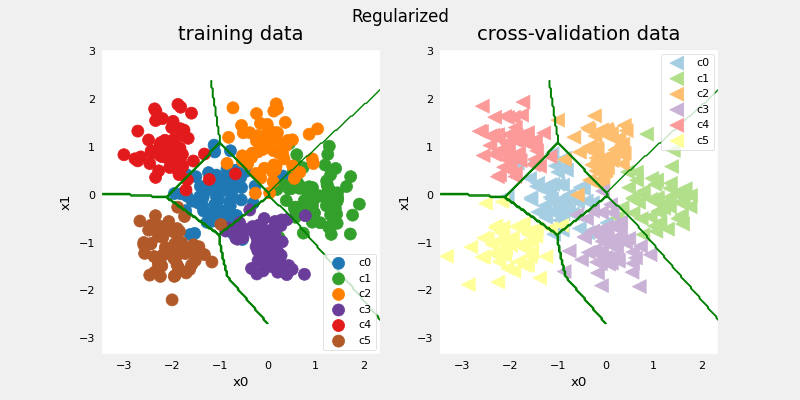

In [33]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [34]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 821us/step
categorization error, training, regularized: 0.068, simple model, 0.068, complex model: 0.007
categorization error, cv,       regularized: 0.072, simple model, 0.056, complex model: 0.119


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [35]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 865us/step - loss: 1.0131
Epoch 2/1000
13/13 [==============================] - 0s 641us/step - loss: 0.3878
Epoch 3/1000
13/13 [==============================] - 0s 706us/step - loss: 0.3085
Epoch 4/1000
13/13 [==============================] - 0s 687us/step - loss: 0.2676
Epoch 5/1000
13/13 [==============================] - 0s 614us/step - loss: 0.2527
Epoch 6/1000
13/13 [==============================] - 0s 625us/step - loss: 0.2665
Epoch 7/1000
13/13 [==============================] - 0s 645us/step - loss: 0.2350
Epoch 8/1000
13/13 [==============================] - 0s 698us/step - loss: 0.2291
Epoch 9/1000
13/13 [==============================] - 0s 630us/step - loss: 0.2356
Epoch 10/1000
13/13 [==============================] - 0s 611us/step - loss: 0.1986
Epoch 11/1000
13/13 [==============================] - 0s 651us/step - loss: 0.2176
Epoch 12/1000
13/13 [==============================] - 0s 600us/step - loss: 0.2071
E

13/13 [==============================] - 0s 636us/step - loss: 0.1731
Epoch 99/1000
13/13 [==============================] - 0s 608us/step - loss: 0.1771
Epoch 100/1000
13/13 [==============================] - 0s 693us/step - loss: 0.1613
Epoch 101/1000
13/13 [==============================] - 0s 637us/step - loss: 0.1733
Epoch 102/1000
13/13 [==============================] - 0s 622us/step - loss: 0.1631
Epoch 103/1000
13/13 [==============================] - 0s 640us/step - loss: 0.1998
Epoch 104/1000
13/13 [==============================] - 0s 625us/step - loss: 0.1705
Epoch 105/1000
13/13 [==============================] - 0s 651us/step - loss: 0.1509
Epoch 106/1000
13/13 [==============================] - 0s 621us/step - loss: 0.1472
Epoch 107/1000
13/13 [==============================] - 0s 638us/step - loss: 0.1574
Epoch 108/1000
13/13 [==============================] - 0s 634us/step - loss: 0.1450
Epoch 109/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1

13/13 [==============================] - 0s 652us/step - loss: 0.0912
Epoch 195/1000
13/13 [==============================] - 0s 650us/step - loss: 0.0999
Epoch 196/1000
13/13 [==============================] - 0s 681us/step - loss: 0.0961
Epoch 197/1000
13/13 [==============================] - 0s 613us/step - loss: 0.1110
Epoch 198/1000
13/13 [==============================] - 0s 650us/step - loss: 0.1038
Epoch 199/1000
13/13 [==============================] - 0s 649us/step - loss: 0.0997
Epoch 200/1000
13/13 [==============================] - 0s 609us/step - loss: 0.1036
Epoch 201/1000
13/13 [==============================] - 0s 664us/step - loss: 0.0916
Epoch 202/1000
13/13 [==============================] - 0s 626us/step - loss: 0.0929
Epoch 203/1000
13/13 [==============================] - 0s 667us/step - loss: 0.0878
Epoch 204/1000
13/13 [==============================] - 0s 645us/step - loss: 0.0962
Epoch 205/1000
13/13 [==============================] - 0s 658us/step - loss: 0.

13/13 [==============================] - 0s 630us/step - loss: 0.0662
Epoch 291/1000
13/13 [==============================] - 0s 610us/step - loss: 0.0648
Epoch 292/1000
13/13 [==============================] - 0s 666us/step - loss: 0.0861
Epoch 293/1000
13/13 [==============================] - 0s 646us/step - loss: 0.0744
Epoch 294/1000
13/13 [==============================] - 0s 670us/step - loss: 0.0671
Epoch 295/1000
13/13 [==============================] - 0s 708us/step - loss: 0.0795
Epoch 296/1000
13/13 [==============================] - 0s 623us/step - loss: 0.1042
Epoch 297/1000
13/13 [==============================] - 0s 626us/step - loss: 0.0709
Epoch 298/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0682
Epoch 299/1000
13/13 [==============================] - 0s 677us/step - loss: 0.0607
Epoch 300/1000
13/13 [==============================] - 0s 618us/step - loss: 0.0630
Epoch 301/1000
13/13 [==============================] - 0s 624us/step - loss: 0.

13/13 [==============================] - 0s 651us/step - loss: 0.0700
Epoch 387/1000
13/13 [==============================] - 0s 632us/step - loss: 0.0582
Epoch 388/1000
13/13 [==============================] - 0s 684us/step - loss: 0.0665
Epoch 389/1000
13/13 [==============================] - 0s 627us/step - loss: 0.1183
Epoch 390/1000
13/13 [==============================] - 0s 938us/step - loss: 0.1117
Epoch 391/1000
13/13 [==============================] - 0s 732us/step - loss: 0.1140
Epoch 392/1000
13/13 [==============================] - 0s 597us/step - loss: 0.0783
Epoch 393/1000
13/13 [==============================] - 0s 648us/step - loss: 0.0676
Epoch 394/1000
13/13 [==============================] - 0s 627us/step - loss: 0.0652
Epoch 395/1000
13/13 [==============================] - 0s 645us/step - loss: 0.0793
Epoch 396/1000
13/13 [==============================] - 0s 661us/step - loss: 0.0875
Epoch 397/1000
13/13 [==============================] - 0s 632us/step - loss: 0.

13/13 [==============================] - 0s 635us/step - loss: 0.0424
Epoch 483/1000
13/13 [==============================] - 0s 634us/step - loss: 0.0422
Epoch 484/1000
13/13 [==============================] - 0s 662us/step - loss: 0.0554
Epoch 485/1000
13/13 [==============================] - 0s 590us/step - loss: 0.0686
Epoch 486/1000
13/13 [==============================] - 0s 639us/step - loss: 0.0634
Epoch 487/1000
13/13 [==============================] - 0s 597us/step - loss: 0.0593
Epoch 488/1000
13/13 [==============================] - 0s 641us/step - loss: 0.0449
Epoch 489/1000
13/13 [==============================] - 0s 598us/step - loss: 0.0447
Epoch 490/1000
13/13 [==============================] - 0s 649us/step - loss: 0.0540
Epoch 491/1000
13/13 [==============================] - 0s 641us/step - loss: 0.0607
Epoch 492/1000
13/13 [==============================] - 0s 624us/step - loss: 0.0509
Epoch 493/1000
13/13 [==============================] - 0s 657us/step - loss: 0.

13/13 [==============================] - 0s 687us/step - loss: 0.0864
Epoch 579/1000
13/13 [==============================] - 0s 632us/step - loss: 0.0739
Epoch 580/1000
13/13 [==============================] - 0s 655us/step - loss: 0.0645
Epoch 581/1000
13/13 [==============================] - 0s 635us/step - loss: 0.0616
Epoch 582/1000
13/13 [==============================] - 0s 643us/step - loss: 0.0574
Epoch 583/1000
13/13 [==============================] - 0s 669us/step - loss: 0.0477
Epoch 584/1000
13/13 [==============================] - 0s 605us/step - loss: 0.0470
Epoch 585/1000
13/13 [==============================] - 0s 658us/step - loss: 0.0397
Epoch 586/1000
13/13 [==============================] - 0s 580us/step - loss: 0.0434
Epoch 587/1000
13/13 [==============================] - 0s 641us/step - loss: 0.0389
Epoch 588/1000
13/13 [==============================] - 0s 600us/step - loss: 0.0349
Epoch 589/1000
13/13 [==============================] - 0s 659us/step - loss: 0.

13/13 [==============================] - 0s 682us/step - loss: 0.0331
Epoch 675/1000
13/13 [==============================] - 0s 631us/step - loss: 0.0332
Epoch 676/1000
13/13 [==============================] - 0s 641us/step - loss: 0.0328
Epoch 677/1000
13/13 [==============================] - 0s 649us/step - loss: 0.0308
Epoch 678/1000
13/13 [==============================] - 0s 611us/step - loss: 0.0325
Epoch 679/1000
13/13 [==============================] - 0s 661us/step - loss: 0.0305
Epoch 680/1000
13/13 [==============================] - 0s 608us/step - loss: 0.0480
Epoch 681/1000
13/13 [==============================] - 0s 657us/step - loss: 0.0679
Epoch 682/1000
13/13 [==============================] - 0s 646us/step - loss: 0.1064
Epoch 683/1000
13/13 [==============================] - 0s 631us/step - loss: 0.1571
Epoch 684/1000
13/13 [==============================] - 0s 675us/step - loss: 0.1579
Epoch 685/1000
13/13 [==============================] - 0s 597us/step - loss: 0.

13/13 [==============================] - 0s 632us/step - loss: 0.0305
Epoch 771/1000
13/13 [==============================] - 0s 698us/step - loss: 0.0303
Epoch 772/1000
13/13 [==============================] - 0s 762us/step - loss: 0.0234
Epoch 773/1000
13/13 [==============================] - 0s 626us/step - loss: 0.0232
Epoch 774/1000
13/13 [==============================] - 0s 691us/step - loss: 0.0225
Epoch 775/1000
13/13 [==============================] - 0s 665us/step - loss: 0.0207
Epoch 776/1000
13/13 [==============================] - 0s 646us/step - loss: 0.0241
Epoch 777/1000
13/13 [==============================] - 0s 730us/step - loss: 0.0227
Epoch 778/1000
13/13 [==============================] - 0s 635us/step - loss: 0.0212
Epoch 779/1000
13/13 [==============================] - 0s 687us/step - loss: 0.0226
Epoch 780/1000
13/13 [==============================] - 0s 679us/step - loss: 0.0215
Epoch 781/1000
13/13 [==============================] - 0s 646us/step - loss: 0.

13/13 [==============================] - 0s 633us/step - loss: 0.0292
Epoch 867/1000
13/13 [==============================] - 0s 674us/step - loss: 0.0302
Epoch 868/1000
13/13 [==============================] - 0s 645us/step - loss: 0.0249
Epoch 869/1000
13/13 [==============================] - 0s 617us/step - loss: 0.0229
Epoch 870/1000
13/13 [==============================] - 0s 648us/step - loss: 0.0315
Epoch 871/1000
13/13 [==============================] - 0s 605us/step - loss: 0.0446
Epoch 872/1000
13/13 [==============================] - 0s 676us/step - loss: 0.0258
Epoch 873/1000
13/13 [==============================] - 0s 663us/step - loss: 0.0249
Epoch 874/1000
13/13 [==============================] - 0s 678us/step - loss: 0.0228
Epoch 875/1000
13/13 [==============================] - 0s 662us/step - loss: 0.0220
Epoch 876/1000
13/13 [==============================] - 0s 635us/step - loss: 0.0193
Epoch 877/1000
13/13 [==============================] - 0s 661us/step - loss: 0.

13/13 [==============================] - 0s 666us/step - loss: 0.0204
Epoch 963/1000
13/13 [==============================] - 0s 679us/step - loss: 0.0216
Epoch 964/1000
13/13 [==============================] - 0s 622us/step - loss: 0.0185
Epoch 965/1000
13/13 [==============================] - 0s 676us/step - loss: 0.0174
Epoch 966/1000
13/13 [==============================] - 0s 597us/step - loss: 0.0191
Epoch 967/1000
13/13 [==============================] - 0s 641us/step - loss: 0.0257
Epoch 968/1000
13/13 [==============================] - 0s 641us/step - loss: 0.0340
Epoch 969/1000
13/13 [==============================] - 0s 621us/step - loss: 0.0707
Epoch 970/1000
13/13 [==============================] - 0s 616us/step - loss: 0.0457
Epoch 971/1000
13/13 [==============================] - 0s 593us/step - loss: 0.0295
Epoch 972/1000
13/13 [==============================] - 0s 669us/step - loss: 0.0493
Epoch 973/1000
13/13 [==============================] - 0s 580us/step - loss: 0.

13/13 [==============================] - 0s 586us/step - loss: 0.2521
Epoch 60/1000
13/13 [==============================] - 0s 655us/step - loss: 0.2638
Epoch 61/1000
13/13 [==============================] - 0s 625us/step - loss: 0.2486
Epoch 62/1000
13/13 [==============================] - 0s 599us/step - loss: 0.2315
Epoch 63/1000
13/13 [==============================] - 0s 615us/step - loss: 0.2326
Epoch 64/1000
13/13 [==============================] - 0s 596us/step - loss: 0.2611
Epoch 65/1000
13/13 [==============================] - 0s 638us/step - loss: 0.2550
Epoch 66/1000
13/13 [==============================] - 0s 614us/step - loss: 0.2572
Epoch 67/1000
13/13 [==============================] - 0s 645us/step - loss: 0.2801
Epoch 68/1000
13/13 [==============================] - 0s 681us/step - loss: 0.2904
Epoch 69/1000
13/13 [==============================] - 0s 679us/step - loss: 0.2485
Epoch 70/1000
13/13 [==============================] - 0s 637us/step - loss: 0.2456
Epoch 

13/13 [==============================] - 0s 593us/step - loss: 0.2138
Epoch 157/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2274
Epoch 158/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2210
Epoch 159/1000
13/13 [==============================] - 0s 619us/step - loss: 0.2037
Epoch 160/1000
13/13 [==============================] - 0s 635us/step - loss: 0.2039
Epoch 161/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2081
Epoch 162/1000
13/13 [==============================] - 0s 662us/step - loss: 0.2133
Epoch 163/1000
13/13 [==============================] - 0s 618us/step - loss: 0.2221
Epoch 164/1000
13/13 [==============================] - 0s 660us/step - loss: 0.2329
Epoch 165/1000
13/13 [==============================] - 0s 628us/step - loss: 0.2164
Epoch 166/1000
13/13 [==============================] - 0s 639us/step - loss: 0.2120
Epoch 167/1000
13/13 [==============================] - 0s 627us/step - loss: 0.

13/13 [==============================] - 0s 655us/step - loss: 0.1915
Epoch 253/1000
13/13 [==============================] - 0s 637us/step - loss: 0.1954
Epoch 254/1000
13/13 [==============================] - 0s 644us/step - loss: 0.2054
Epoch 255/1000
13/13 [==============================] - 0s 636us/step - loss: 0.2039
Epoch 256/1000
13/13 [==============================] - 0s 587us/step - loss: 0.1939
Epoch 257/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2074
Epoch 258/1000
13/13 [==============================] - 0s 601us/step - loss: 0.2069
Epoch 259/1000
13/13 [==============================] - 0s 636us/step - loss: 0.1869
Epoch 260/1000
13/13 [==============================] - 0s 603us/step - loss: 0.1950
Epoch 261/1000
13/13 [==============================] - 0s 626us/step - loss: 0.2039
Epoch 262/1000
13/13 [==============================] - 0s 615us/step - loss: 0.1988
Epoch 263/1000
13/13 [==============================] - 0s 640us/step - loss: 0.

13/13 [==============================] - 0s 638us/step - loss: 0.1918
Epoch 349/1000
13/13 [==============================] - 0s 660us/step - loss: 0.1838
Epoch 350/1000
13/13 [==============================] - 0s 663us/step - loss: 0.1807
Epoch 351/1000
13/13 [==============================] - 0s 599us/step - loss: 0.1851
Epoch 352/1000
13/13 [==============================] - 0s 651us/step - loss: 0.1919
Epoch 353/1000
13/13 [==============================] - 0s 632us/step - loss: 0.1892
Epoch 354/1000
13/13 [==============================] - 0s 647us/step - loss: 0.1845
Epoch 355/1000
13/13 [==============================] - 0s 644us/step - loss: 0.1882
Epoch 356/1000
13/13 [==============================] - 0s 601us/step - loss: 0.1834
Epoch 357/1000
13/13 [==============================] - 0s 657us/step - loss: 0.1795
Epoch 358/1000
13/13 [==============================] - 0s 595us/step - loss: 0.1838
Epoch 359/1000
13/13 [==============================] - 0s 662us/step - loss: 0.

13/13 [==============================] - 0s 658us/step - loss: 0.1759
Epoch 445/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1811
Epoch 446/1000
13/13 [==============================] - 0s 637us/step - loss: 0.1942
Epoch 447/1000
13/13 [==============================] - 0s 611us/step - loss: 0.1847
Epoch 448/1000
13/13 [==============================] - 0s 623us/step - loss: 0.1784
Epoch 449/1000
13/13 [==============================] - 0s 605us/step - loss: 0.1714
Epoch 450/1000
13/13 [==============================] - 0s 615us/step - loss: 0.1759
Epoch 451/1000
13/13 [==============================] - 0s 661us/step - loss: 0.1854
Epoch 452/1000
13/13 [==============================] - 0s 612us/step - loss: 0.1742
Epoch 453/1000
13/13 [==============================] - 0s 656us/step - loss: 0.1763
Epoch 454/1000
13/13 [==============================] - 0s 623us/step - loss: 0.1760
Epoch 455/1000
13/13 [==============================] - 0s 677us/step - loss: 0.

13/13 [==============================] - 0s 712us/step - loss: 0.1738
Epoch 541/1000
13/13 [==============================] - 0s 660us/step - loss: 0.1771
Epoch 542/1000
13/13 [==============================] - 0s 654us/step - loss: 0.1653
Epoch 543/1000
13/13 [==============================] - 0s 679us/step - loss: 0.1657
Epoch 544/1000
13/13 [==============================] - 0s 626us/step - loss: 0.1666
Epoch 545/1000
13/13 [==============================] - 0s 653us/step - loss: 0.1711
Epoch 546/1000
13/13 [==============================] - 0s 619us/step - loss: 0.1700
Epoch 547/1000
13/13 [==============================] - 0s 642us/step - loss: 0.1744
Epoch 548/1000
13/13 [==============================] - 0s 659us/step - loss: 0.1707
Epoch 549/1000
13/13 [==============================] - 0s 649us/step - loss: 0.1764
Epoch 550/1000
13/13 [==============================] - 0s 681us/step - loss: 0.1812
Epoch 551/1000
13/13 [==============================] - 0s 658us/step - loss: 0.

13/13 [==============================] - 0s 673us/step - loss: 0.1704
Epoch 637/1000
13/13 [==============================] - 0s 667us/step - loss: 0.1724
Epoch 638/1000
13/13 [==============================] - 0s 643us/step - loss: 0.1624
Epoch 639/1000
13/13 [==============================] - 0s 678us/step - loss: 0.1612
Epoch 640/1000
13/13 [==============================] - 0s 636us/step - loss: 0.1641
Epoch 641/1000
13/13 [==============================] - 0s 666us/step - loss: 0.1665
Epoch 642/1000
13/13 [==============================] - 0s 660us/step - loss: 0.1635
Epoch 643/1000
13/13 [==============================] - 0s 650us/step - loss: 0.1626
Epoch 644/1000
13/13 [==============================] - 0s 668us/step - loss: 0.1620
Epoch 645/1000
13/13 [==============================] - 0s 629us/step - loss: 0.1687
Epoch 646/1000
13/13 [==============================] - 0s 674us/step - loss: 0.1694
Epoch 647/1000
13/13 [==============================] - 0s 661us/step - loss: 0.

13/13 [==============================] - 0s 680us/step - loss: 0.1929
Epoch 733/1000
13/13 [==============================] - 0s 649us/step - loss: 0.1711
Epoch 734/1000
13/13 [==============================] - 0s 621us/step - loss: 0.1750
Epoch 735/1000
13/13 [==============================] - 0s 672us/step - loss: 0.1751
Epoch 736/1000
13/13 [==============================] - 0s 628us/step - loss: 0.1677
Epoch 737/1000
13/13 [==============================] - 0s 686us/step - loss: 0.1676
Epoch 738/1000
13/13 [==============================] - 0s 643us/step - loss: 0.1643
Epoch 739/1000
13/13 [==============================] - 0s 642us/step - loss: 0.1675
Epoch 740/1000
13/13 [==============================] - 0s 659us/step - loss: 0.1616
Epoch 741/1000
13/13 [==============================] - 0s 616us/step - loss: 0.1660
Epoch 742/1000
13/13 [==============================] - 0s 663us/step - loss: 0.1552
Epoch 743/1000
13/13 [==============================] - 0s 644us/step - loss: 0.

13/13 [==============================] - 0s 629us/step - loss: 0.1622
Epoch 829/1000
13/13 [==============================] - 0s 634us/step - loss: 0.1535
Epoch 830/1000
13/13 [==============================] - 0s 624us/step - loss: 0.1566
Epoch 831/1000
13/13 [==============================] - 0s 600us/step - loss: 0.1602
Epoch 832/1000
13/13 [==============================] - 0s 663us/step - loss: 0.1549
Epoch 833/1000
13/13 [==============================] - 0s 602us/step - loss: 0.1618
Epoch 834/1000
13/13 [==============================] - 0s 661us/step - loss: 0.1535
Epoch 835/1000
13/13 [==============================] - 0s 612us/step - loss: 0.1511
Epoch 836/1000
13/13 [==============================] - 0s 602us/step - loss: 0.1534
Epoch 837/1000
13/13 [==============================] - 0s 645us/step - loss: 0.1597
Epoch 838/1000
13/13 [==============================] - 0s 588us/step - loss: 0.1553
Epoch 839/1000
13/13 [==============================] - 0s 642us/step - loss: 0.

13/13 [==============================] - 0s 628us/step - loss: 0.1501
Epoch 925/1000
13/13 [==============================] - 0s 619us/step - loss: 0.1510
Epoch 926/1000
13/13 [==============================] - 0s 608us/step - loss: 0.1481
Epoch 927/1000
13/13 [==============================] - 0s 634us/step - loss: 0.1459
Epoch 928/1000
13/13 [==============================] - 0s 587us/step - loss: 0.1477
Epoch 929/1000
13/13 [==============================] - 0s 627us/step - loss: 0.1467
Epoch 930/1000
13/13 [==============================] - 0s 600us/step - loss: 0.1482
Epoch 931/1000
13/13 [==============================] - 0s 636us/step - loss: 0.1564
Epoch 932/1000
13/13 [==============================] - 0s 601us/step - loss: 0.1504
Epoch 933/1000
13/13 [==============================] - 0s 620us/step - loss: 0.1556
Epoch 934/1000
13/13 [==============================] - 0s 622us/step - loss: 0.1559
Epoch 935/1000
13/13 [==============================] - 0s 636us/step - loss: 0.

13/13 [==============================] - 0s 655us/step - loss: 0.3698
Epoch 21/1000
13/13 [==============================] - 0s 639us/step - loss: 0.3653
Epoch 22/1000
13/13 [==============================] - 0s 688us/step - loss: 0.3875
Epoch 23/1000
13/13 [==============================] - 0s 645us/step - loss: 0.3792
Epoch 24/1000
13/13 [==============================] - 0s 688us/step - loss: 0.3704
Epoch 25/1000
13/13 [==============================] - 0s 650us/step - loss: 0.4486
Epoch 26/1000
13/13 [==============================] - 0s 622us/step - loss: 0.4172
Epoch 27/1000
13/13 [==============================] - 0s 654us/step - loss: 0.4045
Epoch 28/1000
13/13 [==============================] - 0s 618us/step - loss: 0.3657
Epoch 29/1000
13/13 [==============================] - 0s 645us/step - loss: 0.3430
Epoch 30/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3626
Epoch 31/1000
13/13 [==============================] - 0s 648us/step - loss: 0.3526
Epoch 

13/13 [==============================] - 0s 616us/step - loss: 0.2727
Epoch 118/1000
13/13 [==============================] - 0s 672us/step - loss: 0.2728
Epoch 119/1000
13/13 [==============================] - 0s 644us/step - loss: 0.3011
Epoch 120/1000
13/13 [==============================] - 0s 644us/step - loss: 0.2956
Epoch 121/1000
13/13 [==============================] - 0s 640us/step - loss: 0.2992
Epoch 122/1000
13/13 [==============================] - 0s 622us/step - loss: 0.2932
Epoch 123/1000
13/13 [==============================] - 0s 676us/step - loss: 0.2855
Epoch 124/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2726
Epoch 125/1000
13/13 [==============================] - 0s 712us/step - loss: 0.2670
Epoch 126/1000
13/13 [==============================] - 0s 650us/step - loss: 0.2781
Epoch 127/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2927
Epoch 128/1000
13/13 [==============================] - 0s 662us/step - loss: 0.

13/13 [==============================] - 0s 666us/step - loss: 0.2692
Epoch 214/1000
13/13 [==============================] - 0s 627us/step - loss: 0.2646
Epoch 215/1000
13/13 [==============================] - 0s 752us/step - loss: 0.2671
Epoch 216/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2634
Epoch 217/1000
13/13 [==============================] - 0s 663us/step - loss: 0.2647
Epoch 218/1000
13/13 [==============================] - 0s 739us/step - loss: 0.2709
Epoch 219/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2719
Epoch 220/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2559
Epoch 221/1000
13/13 [==============================] - 0s 877us/step - loss: 0.2551
Epoch 222/1000
13/13 [==============================] - 0s 766us/step - loss: 0.2637
Epoch 223/1000
13/13 [==============================] - 0s 665us/step - loss: 0.2619
Epoch 224/1000
13/13 [==============================] - 0s 625us/step - loss: 0.2714

13/13 [==============================] - 0s 644us/step - loss: 0.2485
Epoch 310/1000
13/13 [==============================] - 0s 638us/step - loss: 0.2509
Epoch 311/1000
13/13 [==============================] - 0s 598us/step - loss: 0.2455
Epoch 312/1000
13/13 [==============================] - 0s 594us/step - loss: 0.2467
Epoch 313/1000
13/13 [==============================] - 0s 651us/step - loss: 0.2964
Epoch 314/1000
13/13 [==============================] - 0s 600us/step - loss: 0.2627
Epoch 315/1000
13/13 [==============================] - 0s 610us/step - loss: 0.2604
Epoch 316/1000
13/13 [==============================] - 0s 611us/step - loss: 0.2564
Epoch 317/1000
13/13 [==============================] - 0s 614us/step - loss: 0.2455
Epoch 318/1000
13/13 [==============================] - 0s 611us/step - loss: 0.2486
Epoch 319/1000
13/13 [==============================] - 0s 646us/step - loss: 0.2678
Epoch 320/1000
13/13 [==============================] - 0s 624us/step - loss: 0.

13/13 [==============================] - 0s 594us/step - loss: 0.2436
Epoch 406/1000
13/13 [==============================] - 0s 641us/step - loss: 0.2320
Epoch 407/1000
13/13 [==============================] - 0s 657us/step - loss: 0.2335
Epoch 408/1000
13/13 [==============================] - 0s 623us/step - loss: 0.2496
Epoch 409/1000
13/13 [==============================] - 0s 589us/step - loss: 0.2363
Epoch 410/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2390
Epoch 411/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2628
Epoch 412/1000
13/13 [==============================] - 0s 593us/step - loss: 0.2473
Epoch 413/1000
13/13 [==============================] - 0s 580us/step - loss: 0.2334
Epoch 414/1000
13/13 [==============================] - 0s 600us/step - loss: 0.2342
Epoch 415/1000
13/13 [==============================] - 0s 612us/step - loss: 0.2462
Epoch 416/1000
13/13 [==============================] - 0s 588us/step - loss: 0.

13/13 [==============================] - 0s 596us/step - loss: 0.2382
Epoch 502/1000
13/13 [==============================] - 0s 595us/step - loss: 0.2372
Epoch 503/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2481
Epoch 504/1000
13/13 [==============================] - 0s 590us/step - loss: 0.2370
Epoch 505/1000
13/13 [==============================] - 0s 580us/step - loss: 0.2263
Epoch 506/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2393
Epoch 507/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2388
Epoch 508/1000
13/13 [==============================] - 0s 589us/step - loss: 0.2304
Epoch 509/1000
13/13 [==============================] - 0s 580us/step - loss: 0.2428
Epoch 510/1000
13/13 [==============================] - 0s 590us/step - loss: 0.2345
Epoch 511/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2280
Epoch 512/1000
13/13 [==============================] - 0s 587us/step - loss: 0.

13/13 [==============================] - 0s 607us/step - loss: 0.2610
Epoch 598/1000
13/13 [==============================] - 0s 607us/step - loss: 0.2505
Epoch 599/1000
13/13 [==============================] - 0s 616us/step - loss: 0.2379
Epoch 600/1000
13/13 [==============================] - 0s 623us/step - loss: 0.2365
Epoch 601/1000
13/13 [==============================] - 0s 630us/step - loss: 0.2272
Epoch 602/1000
13/13 [==============================] - 0s 632us/step - loss: 0.2388
Epoch 603/1000
13/13 [==============================] - 0s 632us/step - loss: 0.2614
Epoch 604/1000
13/13 [==============================] - 0s 612us/step - loss: 0.2528
Epoch 605/1000
13/13 [==============================] - 0s 612us/step - loss: 0.2350
Epoch 606/1000
13/13 [==============================] - 0s 603us/step - loss: 0.2367
Epoch 607/1000
13/13 [==============================] - 0s 615us/step - loss: 0.2355
Epoch 608/1000
13/13 [==============================] - 0s 652us/step - loss: 0.

13/13 [==============================] - 0s 631us/step - loss: 0.2220
Epoch 694/1000
13/13 [==============================] - 0s 623us/step - loss: 0.2298
Epoch 695/1000
13/13 [==============================] - 0s 598us/step - loss: 0.2289
Epoch 696/1000
13/13 [==============================] - 0s 635us/step - loss: 0.2214
Epoch 697/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2330
Epoch 698/1000
13/13 [==============================] - 0s 639us/step - loss: 0.2374
Epoch 699/1000
13/13 [==============================] - 0s 615us/step - loss: 0.2294
Epoch 700/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2333
Epoch 701/1000
13/13 [==============================] - 0s 627us/step - loss: 0.2241
Epoch 702/1000
13/13 [==============================] - 0s 653us/step - loss: 0.2218
Epoch 703/1000
13/13 [==============================] - 0s 612us/step - loss: 0.2375
Epoch 704/1000
13/13 [==============================] - 0s 595us/step - loss: 0.

13/13 [==============================] - 0s 652us/step - loss: 0.2202
Epoch 790/1000
13/13 [==============================] - 0s 643us/step - loss: 0.2269
Epoch 791/1000
13/13 [==============================] - 0s 644us/step - loss: 0.2395
Epoch 792/1000
13/13 [==============================] - 0s 665us/step - loss: 0.2334
Epoch 793/1000
13/13 [==============================] - 0s 650us/step - loss: 0.2199
Epoch 794/1000
13/13 [==============================] - 0s 635us/step - loss: 0.2436
Epoch 795/1000
13/13 [==============================] - 0s 633us/step - loss: 0.2104
Epoch 796/1000
13/13 [==============================] - 0s 610us/step - loss: 0.2386
Epoch 797/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2333
Epoch 798/1000
13/13 [==============================] - 0s 622us/step - loss: 0.2374
Epoch 799/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2212
Epoch 800/1000
13/13 [==============================] - 0s 580us/step - loss: 0.

13/13 [==============================] - 0s 616us/step - loss: 0.2350
Epoch 886/1000
13/13 [==============================] - 0s 645us/step - loss: 0.2271
Epoch 887/1000
13/13 [==============================] - 0s 936us/step - loss: 0.2229
Epoch 888/1000
13/13 [==============================] - 0s 642us/step - loss: 0.2331
Epoch 889/1000
13/13 [==============================] - 0s 646us/step - loss: 0.2178
Epoch 890/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2243
Epoch 891/1000
13/13 [==============================] - 0s 614us/step - loss: 0.2322
Epoch 892/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2215
Epoch 893/1000
13/13 [==============================] - 0s 596us/step - loss: 0.2394
Epoch 894/1000
13/13 [==============================] - 0s 601us/step - loss: 0.2250
Epoch 895/1000
13/13 [==============================] - 0s 925us/step - loss: 0.2413
Epoch 896/1000
13/13 [==============================] - 0s 824us/step - loss: 0.

13/13 [==============================] - 0s 604us/step - loss: 0.2202
Epoch 982/1000
13/13 [==============================] - 0s 616us/step - loss: 0.2205
Epoch 983/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2255
Epoch 984/1000
13/13 [==============================] - 0s 614us/step - loss: 0.2127
Epoch 985/1000
13/13 [==============================] - 0s 621us/step - loss: 0.2204
Epoch 986/1000
13/13 [==============================] - 0s 616us/step - loss: 0.2201
Epoch 987/1000
13/13 [==============================] - 0s 608us/step - loss: 0.2126
Epoch 988/1000
13/13 [==============================] - 0s 607us/step - loss: 0.2131
Epoch 989/1000
13/13 [==============================] - 0s 595us/step - loss: 0.2426
Epoch 990/1000
13/13 [==============================] - 0s 602us/step - loss: 0.2279
Epoch 991/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2223
Epoch 992/1000
13/13 [==============================] - 0s 601us/step - loss: 0.

13/13 [==============================] - 0s 624us/step - loss: 0.4094
Epoch 79/1000
13/13 [==============================] - 0s 629us/step - loss: 0.4216
Epoch 80/1000
13/13 [==============================] - 0s 611us/step - loss: 0.4090
Epoch 81/1000
13/13 [==============================] - 0s 611us/step - loss: 0.4080
Epoch 82/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3986
Epoch 83/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3896
Epoch 84/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3828
Epoch 85/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3992
Epoch 86/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3968
Epoch 87/1000
13/13 [==============================] - 0s 594us/step - loss: 0.4282
Epoch 88/1000
13/13 [==============================] - 0s 581us/step - loss: 0.4041
Epoch 89/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3947
Epoch 

13/13 [==============================] - 0s 646us/step - loss: 0.3961
Epoch 175/1000
13/13 [==============================] - 0s 647us/step - loss: 0.3770
Epoch 176/1000
13/13 [==============================] - 0s 618us/step - loss: 0.3906
Epoch 177/1000
13/13 [==============================] - 0s 640us/step - loss: 0.3695
Epoch 178/1000
13/13 [==============================] - 0s 633us/step - loss: 0.3498
Epoch 179/1000
13/13 [==============================] - 0s 628us/step - loss: 0.3557
Epoch 180/1000
13/13 [==============================] - 0s 681us/step - loss: 0.3492
Epoch 181/1000
13/13 [==============================] - 0s 636us/step - loss: 0.3786
Epoch 182/1000
13/13 [==============================] - 0s 641us/step - loss: 0.3678
Epoch 183/1000
13/13 [==============================] - 0s 637us/step - loss: 0.3496
Epoch 184/1000
13/13 [==============================] - 0s 619us/step - loss: 0.3418
Epoch 185/1000
13/13 [==============================] - 0s 617us/step - loss: 0.

13/13 [==============================] - 0s 590us/step - loss: 0.3431
Epoch 271/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3323
Epoch 272/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3347
Epoch 273/1000
13/13 [==============================] - 0s 614us/step - loss: 0.3488
Epoch 274/1000
13/13 [==============================] - 0s 627us/step - loss: 0.3248
Epoch 275/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3415
Epoch 276/1000
13/13 [==============================] - 0s 611us/step - loss: 0.3319
Epoch 277/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3282
Epoch 278/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3320
Epoch 279/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3464
Epoch 280/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3417
Epoch 281/1000
13/13 [==============================] - 0s 608us/step - loss: 0.

13/13 [==============================] - 0s 629us/step - loss: 0.3181
Epoch 367/1000
13/13 [==============================] - 0s 651us/step - loss: 0.3300
Epoch 368/1000
13/13 [==============================] - 0s 641us/step - loss: 0.3498
Epoch 369/1000
13/13 [==============================] - 0s 637us/step - loss: 0.3615
Epoch 370/1000
13/13 [==============================] - 0s 651us/step - loss: 0.3348
Epoch 371/1000
13/13 [==============================] - 0s 621us/step - loss: 0.3215
Epoch 372/1000
13/13 [==============================] - 0s 634us/step - loss: 0.3192
Epoch 373/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3362
Epoch 374/1000
13/13 [==============================] - 0s 654us/step - loss: 0.3142
Epoch 375/1000
13/13 [==============================] - 0s 616us/step - loss: 0.3371
Epoch 376/1000
13/13 [==============================] - 0s 633us/step - loss: 0.3216
Epoch 377/1000
13/13 [==============================] - 0s 637us/step - loss: 0.

13/13 [==============================] - 0s 615us/step - loss: 0.3192
Epoch 463/1000
13/13 [==============================] - 0s 613us/step - loss: 0.3192
Epoch 464/1000
13/13 [==============================] - 0s 623us/step - loss: 0.3214
Epoch 465/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3284
Epoch 466/1000
13/13 [==============================] - 0s 642us/step - loss: 0.3488
Epoch 467/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3510
Epoch 468/1000
13/13 [==============================] - 0s 640us/step - loss: 0.3602
Epoch 469/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3110
Epoch 470/1000
13/13 [==============================] - 0s 642us/step - loss: 0.3103
Epoch 471/1000
13/13 [==============================] - 0s 608us/step - loss: 0.3162
Epoch 472/1000
13/13 [==============================] - 0s 613us/step - loss: 0.3268
Epoch 473/1000
13/13 [==============================] - 0s 604us/step - loss: 0.

13/13 [==============================] - 0s 617us/step - loss: 0.3080
Epoch 559/1000
13/13 [==============================] - 0s 623us/step - loss: 0.3225
Epoch 560/1000
13/13 [==============================] - 0s 610us/step - loss: 0.3085
Epoch 561/1000
13/13 [==============================] - 0s 628us/step - loss: 0.2948
Epoch 562/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3076
Epoch 563/1000
13/13 [==============================] - 0s 659us/step - loss: 0.3232
Epoch 564/1000
13/13 [==============================] - 0s 632us/step - loss: 0.3308
Epoch 565/1000
13/13 [==============================] - 0s 639us/step - loss: 0.3095
Epoch 566/1000
13/13 [==============================] - 0s 631us/step - loss: 0.3036
Epoch 567/1000
13/13 [==============================] - 0s 622us/step - loss: 0.3052
Epoch 568/1000
13/13 [==============================] - 0s 626us/step - loss: 0.2999
Epoch 569/1000
13/13 [==============================] - 0s 615us/step - loss: 0.

13/13 [==============================] - 0s 621us/step - loss: 0.3187
Epoch 655/1000
13/13 [==============================] - 0s 607us/step - loss: 0.2974
Epoch 656/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2932
Epoch 657/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3100
Epoch 658/1000
13/13 [==============================] - 0s 616us/step - loss: 0.3133
Epoch 659/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3262
Epoch 660/1000
13/13 [==============================] - 0s 620us/step - loss: 0.3372
Epoch 661/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3148
Epoch 662/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3061
Epoch 663/1000
13/13 [==============================] - 0s 627us/step - loss: 0.3210
Epoch 664/1000
13/13 [==============================] - 0s 610us/step - loss: 0.3080
Epoch 665/1000
13/13 [==============================] - 0s 613us/step - loss: 0.

13/13 [==============================] - 0s 619us/step - loss: 0.3024
Epoch 751/1000
13/13 [==============================] - 0s 642us/step - loss: 0.3115
Epoch 752/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3212
Epoch 753/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3024
Epoch 754/1000
13/13 [==============================] - 0s 579us/step - loss: 0.2892
Epoch 755/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2994
Epoch 756/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3141
Epoch 757/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3109
Epoch 758/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3024
Epoch 759/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2915
Epoch 760/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3030
Epoch 761/1000
13/13 [==============================] - 0s 570us/step - loss: 0.

13/13 [==============================] - 0s 630us/step - loss: 0.2906
Epoch 847/1000
13/13 [==============================] - 0s 603us/step - loss: 0.3089
Epoch 848/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3087
Epoch 849/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2768
Epoch 850/1000
13/13 [==============================] - 0s 615us/step - loss: 0.2918
Epoch 851/1000
13/13 [==============================] - 0s 633us/step - loss: 0.2909
Epoch 852/1000
13/13 [==============================] - 0s 636us/step - loss: 0.3124
Epoch 853/1000
13/13 [==============================] - 0s 630us/step - loss: 0.3137
Epoch 854/1000
13/13 [==============================] - 0s 630us/step - loss: 0.2988
Epoch 855/1000
13/13 [==============================] - 0s 614us/step - loss: 0.2929
Epoch 856/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2903
Epoch 857/1000
13/13 [==============================] - 0s 604us/step - loss: 0.

13/13 [==============================] - 0s 590us/step - loss: 0.2788
Epoch 943/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2993
Epoch 944/1000
13/13 [==============================] - 0s 590us/step - loss: 0.2932
Epoch 945/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3045
Epoch 946/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2806
Epoch 947/1000
13/13 [==============================] - 0s 598us/step - loss: 0.2909
Epoch 948/1000
13/13 [==============================] - 0s 593us/step - loss: 0.2918
Epoch 949/1000
13/13 [==============================] - 0s 592us/step - loss: 0.2867
Epoch 950/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2899
Epoch 951/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2773
Epoch 952/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3187
Epoch 953/1000
13/13 [==============================] - 0s 582us/step - loss: 0.

13/13 [==============================] - 0s 585us/step - loss: 0.5656
Epoch 39/1000
13/13 [==============================] - 0s 587us/step - loss: 0.5713
Epoch 40/1000
13/13 [==============================] - 0s 589us/step - loss: 0.5708
Epoch 41/1000
13/13 [==============================] - 0s 611us/step - loss: 0.5841
Epoch 42/1000
13/13 [==============================] - 0s 578us/step - loss: 0.5543
Epoch 43/1000
13/13 [==============================] - 0s 588us/step - loss: 0.5841
Epoch 44/1000
13/13 [==============================] - 0s 590us/step - loss: 0.5960
Epoch 45/1000
13/13 [==============================] - 0s 588us/step - loss: 0.5896
Epoch 46/1000
13/13 [==============================] - 0s 588us/step - loss: 0.5764
Epoch 47/1000
13/13 [==============================] - 0s 590us/step - loss: 0.5375
Epoch 48/1000
13/13 [==============================] - 0s 611us/step - loss: 0.5698
Epoch 49/1000
13/13 [==============================] - 0s 599us/step - loss: 0.5490
Epoch 

13/13 [==============================] - 0s 609us/step - loss: 0.4403
Epoch 136/1000
13/13 [==============================] - 0s 609us/step - loss: 0.4497
Epoch 137/1000
13/13 [==============================] - 0s 612us/step - loss: 0.4364
Epoch 138/1000
13/13 [==============================] - 0s 616us/step - loss: 0.4505
Epoch 139/1000
13/13 [==============================] - 0s 618us/step - loss: 0.4466
Epoch 140/1000
13/13 [==============================] - 0s 617us/step - loss: 0.4705
Epoch 141/1000
13/13 [==============================] - 0s 621us/step - loss: 0.4587
Epoch 142/1000
13/13 [==============================] - 0s 614us/step - loss: 0.4352
Epoch 143/1000
13/13 [==============================] - 0s 640us/step - loss: 0.4499
Epoch 144/1000
13/13 [==============================] - 0s 605us/step - loss: 0.4575
Epoch 145/1000
13/13 [==============================] - 0s 609us/step - loss: 0.4294
Epoch 146/1000
13/13 [==============================] - 0s 625us/step - loss: 0.

13/13 [==============================] - 0s 617us/step - loss: 0.4067
Epoch 232/1000
13/13 [==============================] - 0s 612us/step - loss: 0.4185
Epoch 233/1000
13/13 [==============================] - 0s 611us/step - loss: 0.3948
Epoch 234/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3933
Epoch 235/1000
13/13 [==============================] - 0s 618us/step - loss: 0.3908
Epoch 236/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3986
Epoch 237/1000
13/13 [==============================] - 0s 618us/step - loss: 0.4011
Epoch 238/1000
13/13 [==============================] - 0s 611us/step - loss: 0.4255
Epoch 239/1000
13/13 [==============================] - 0s 605us/step - loss: 0.4164
Epoch 240/1000
13/13 [==============================] - 0s 607us/step - loss: 0.3957
Epoch 241/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3937
Epoch 242/1000
13/13 [==============================] - 0s 602us/step - loss: 0.

13/13 [==============================] - 0s 626us/step - loss: 0.3813
Epoch 328/1000
13/13 [==============================] - 0s 631us/step - loss: 0.4012
Epoch 329/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3820
Epoch 330/1000
13/13 [==============================] - 0s 629us/step - loss: 0.3693
Epoch 331/1000
13/13 [==============================] - 0s 649us/step - loss: 0.3740
Epoch 332/1000
13/13 [==============================] - 0s 624us/step - loss: 0.3773
Epoch 333/1000
13/13 [==============================] - 0s 689us/step - loss: 0.4139
Epoch 334/1000
13/13 [==============================] - 0s 663us/step - loss: 0.3971
Epoch 335/1000
13/13 [==============================] - 0s 645us/step - loss: 0.3999
Epoch 336/1000
13/13 [==============================] - 0s 670us/step - loss: 0.4069
Epoch 337/1000
13/13 [==============================] - 0s 699us/step - loss: 0.4156
Epoch 338/1000
13/13 [==============================] - 0s 669us/step - loss: 0.

13/13 [==============================] - 0s 627us/step - loss: 0.3736
Epoch 424/1000
13/13 [==============================] - 0s 633us/step - loss: 0.3762
Epoch 425/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3641
Epoch 426/1000
13/13 [==============================] - 0s 626us/step - loss: 0.3627
Epoch 427/1000
13/13 [==============================] - 0s 623us/step - loss: 0.3655
Epoch 428/1000
13/13 [==============================] - 0s 621us/step - loss: 0.3747
Epoch 429/1000
13/13 [==============================] - 0s 865us/step - loss: 0.3738
Epoch 430/1000
13/13 [==============================] - 0s 863us/step - loss: 0.3730
Epoch 431/1000
13/13 [==============================] - 0s 639us/step - loss: 0.3580
Epoch 432/1000
13/13 [==============================] - 0s 627us/step - loss: 0.3659
Epoch 433/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3977
Epoch 434/1000
13/13 [==============================] - 0s 602us/step - loss: 0.

13/13 [==============================] - 0s 630us/step - loss: 0.3671
Epoch 520/1000
13/13 [==============================] - 0s 616us/step - loss: 0.3704
Epoch 521/1000
13/13 [==============================] - 0s 618us/step - loss: 0.3634
Epoch 522/1000
13/13 [==============================] - 0s 654us/step - loss: 0.3751
Epoch 523/1000
13/13 [==============================] - 0s 899us/step - loss: 0.3856
Epoch 524/1000
13/13 [==============================] - 0s 805us/step - loss: 0.3424
Epoch 525/1000
13/13 [==============================] - 0s 662us/step - loss: 0.3515
Epoch 526/1000
13/13 [==============================] - 0s 648us/step - loss: 0.3556
Epoch 527/1000
13/13 [==============================] - 0s 614us/step - loss: 0.3425
Epoch 528/1000
13/13 [==============================] - 0s 656us/step - loss: 0.3481
Epoch 529/1000
13/13 [==============================] - 0s 753us/step - loss: 0.3794
Epoch 530/1000
13/13 [==============================] - 0s 659us/step - loss: 0.

13/13 [==============================] - 0s 715us/step - loss: 0.3628
Epoch 616/1000
13/13 [==============================] - 0s 672us/step - loss: 0.3552
Epoch 617/1000
13/13 [==============================] - 0s 701us/step - loss: 0.3339
Epoch 618/1000
13/13 [==============================] - 0s 647us/step - loss: 0.3720
Epoch 619/1000
13/13 [==============================] - 0s 689us/step - loss: 0.4023
Epoch 620/1000
13/13 [==============================] - 0s 680us/step - loss: 0.3936
Epoch 621/1000
13/13 [==============================] - 0s 696us/step - loss: 0.3504
Epoch 622/1000
13/13 [==============================] - 0s 833us/step - loss: 0.3510
Epoch 623/1000
13/13 [==============================] - 0s 884us/step - loss: 0.3457
Epoch 624/1000
13/13 [==============================] - 0s 733us/step - loss: 0.3340
Epoch 625/1000
13/13 [==============================] - 0s 749us/step - loss: 0.3340
Epoch 626/1000
13/13 [==============================] - 0s 677us/step - loss: 0.

13/13 [==============================] - 0s 628us/step - loss: 0.3424
Epoch 712/1000
13/13 [==============================] - 0s 635us/step - loss: 0.3818
Epoch 713/1000
13/13 [==============================] - 0s 643us/step - loss: 0.3506
Epoch 714/1000
13/13 [==============================] - 0s 700us/step - loss: 0.3510
Epoch 715/1000
13/13 [==============================] - 0s 742us/step - loss: 0.3311
Epoch 716/1000
13/13 [==============================] - 0s 686us/step - loss: 0.3408
Epoch 717/1000
13/13 [==============================] - 0s 703us/step - loss: 0.3588
Epoch 718/1000
13/13 [==============================] - 0s 646us/step - loss: 0.3764
Epoch 719/1000
13/13 [==============================] - 0s 655us/step - loss: 0.4341
Epoch 720/1000
13/13 [==============================] - 0s 637us/step - loss: 0.4092
Epoch 721/1000
13/13 [==============================] - 0s 729us/step - loss: 0.3592
Epoch 722/1000
13/13 [==============================] - 0s 665us/step - loss: 0.

13/13 [==============================] - 0s 596us/step - loss: 0.3419
Epoch 808/1000
13/13 [==============================] - 0s 616us/step - loss: 0.3489
Epoch 809/1000
13/13 [==============================] - 0s 604us/step - loss: 0.3779
Epoch 810/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3548
Epoch 811/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3540
Epoch 812/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3398
Epoch 813/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3473
Epoch 814/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3510
Epoch 815/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3446
Epoch 816/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3411
Epoch 817/1000
13/13 [==============================] - 0s 614us/step - loss: 0.3537
Epoch 818/1000
13/13 [==============================] - 0s 607us/step - loss: 0.

13/13 [==============================] - 0s 650us/step - loss: 0.3484
Epoch 904/1000
13/13 [==============================] - 0s 613us/step - loss: 0.3282
Epoch 905/1000
13/13 [==============================] - 0s 611us/step - loss: 0.3402
Epoch 906/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3571
Epoch 907/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3365
Epoch 908/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3510
Epoch 909/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3780
Epoch 910/1000
13/13 [==============================] - 0s 616us/step - loss: 0.3647
Epoch 911/1000
13/13 [==============================] - 0s 611us/step - loss: 0.3240
Epoch 912/1000
13/13 [==============================] - 0s 624us/step - loss: 0.3250
Epoch 913/1000
13/13 [==============================] - 0s 658us/step - loss: 0.3281
Epoch 914/1000
13/13 [==============================] - 0s 595us/step - loss: 0.

13/13 [==============================] - 0s 617us/step - loss: 0.3689
Epoch 1000/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3550
Finished lambda = 0.1
Epoch 1/1000
13/13 [==============================] - 0s 691us/step - loss: 7.2861
Epoch 2/1000
13/13 [==============================] - 0s 634us/step - loss: 2.0775
Epoch 3/1000
13/13 [==============================] - 0s 632us/step - loss: 1.8024
Epoch 4/1000
13/13 [==============================] - 0s 623us/step - loss: 1.4869
Epoch 5/1000
13/13 [==============================] - 0s 623us/step - loss: 1.3448
Epoch 6/1000
13/13 [==============================] - 0s 605us/step - loss: 1.2795
Epoch 7/1000
13/13 [==============================] - 0s 617us/step - loss: 1.1920
Epoch 8/1000
13/13 [==============================] - 0s 748us/step - loss: 1.1367
Epoch 9/1000
13/13 [==============================] - 0s 669us/step - loss: 1.0569
Epoch 10/1000
13/13 [==============================] - 0s 605us/step - loss

13/13 [==============================] - 0s 591us/step - loss: 0.5716
Epoch 97/1000
13/13 [==============================] - 0s 622us/step - loss: 0.5787
Epoch 98/1000
13/13 [==============================] - 0s 591us/step - loss: 0.5811
Epoch 99/1000
13/13 [==============================] - 0s 572us/step - loss: 0.6049
Epoch 100/1000
13/13 [==============================] - 0s 591us/step - loss: 0.6167
Epoch 101/1000
13/13 [==============================] - 0s 581us/step - loss: 0.6194
Epoch 102/1000
13/13 [==============================] - 0s 586us/step - loss: 0.5976
Epoch 103/1000
13/13 [==============================] - 0s 573us/step - loss: 0.5841
Epoch 104/1000
13/13 [==============================] - 0s 589us/step - loss: 0.5782
Epoch 105/1000
13/13 [==============================] - 0s 573us/step - loss: 0.6277
Epoch 106/1000
13/13 [==============================] - 0s 571us/step - loss: 0.6136
Epoch 107/1000
13/13 [==============================] - 0s 574us/step - loss: 0.586

13/13 [==============================] - 0s 655us/step - loss: 0.5067
Epoch 193/1000
13/13 [==============================] - 0s 634us/step - loss: 0.4952
Epoch 194/1000
13/13 [==============================] - 0s 635us/step - loss: 0.4969
Epoch 195/1000
13/13 [==============================] - 0s 631us/step - loss: 0.4885
Epoch 196/1000
13/13 [==============================] - 0s 639us/step - loss: 0.4876
Epoch 197/1000
13/13 [==============================] - 0s 637us/step - loss: 0.5054
Epoch 198/1000
13/13 [==============================] - 0s 631us/step - loss: 0.4877
Epoch 199/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4974
Epoch 200/1000
13/13 [==============================] - 0s 608us/step - loss: 0.4913
Epoch 201/1000
13/13 [==============================] - 0s 616us/step - loss: 0.5133
Epoch 202/1000
13/13 [==============================] - 0s 599us/step - loss: 0.4866
Epoch 203/1000
13/13 [==============================] - 0s 620us/step - loss: 0.

13/13 [==============================] - 0s 659us/step - loss: 0.4781
Epoch 289/1000
13/13 [==============================] - 0s 616us/step - loss: 0.4621
Epoch 290/1000
13/13 [==============================] - 0s 626us/step - loss: 0.4687
Epoch 291/1000
13/13 [==============================] - 0s 622us/step - loss: 0.4732
Epoch 292/1000
13/13 [==============================] - 0s 610us/step - loss: 0.4513
Epoch 293/1000
13/13 [==============================] - 0s 621us/step - loss: 0.4555
Epoch 294/1000
13/13 [==============================] - 0s 614us/step - loss: 0.4654
Epoch 295/1000
13/13 [==============================] - 0s 622us/step - loss: 0.4916
Epoch 296/1000
13/13 [==============================] - 0s 608us/step - loss: 0.4640
Epoch 297/1000
13/13 [==============================] - 0s 634us/step - loss: 0.4601
Epoch 298/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4664
Epoch 299/1000
13/13 [==============================] - 0s 631us/step - loss: 0.

13/13 [==============================] - 0s 663us/step - loss: 0.4308
Epoch 385/1000
13/13 [==============================] - 0s 627us/step - loss: 0.4371
Epoch 386/1000
13/13 [==============================] - 0s 633us/step - loss: 0.4250
Epoch 387/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4426
Epoch 388/1000
13/13 [==============================] - 0s 579us/step - loss: 0.4358
Epoch 389/1000
13/13 [==============================] - 0s 662us/step - loss: 0.4321
Epoch 390/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4225
Epoch 391/1000
13/13 [==============================] - 0s 573us/step - loss: 0.4339
Epoch 392/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4404
Epoch 393/1000
13/13 [==============================] - 0s 607us/step - loss: 0.4295
Epoch 394/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4460
Epoch 395/1000
13/13 [==============================] - 0s 623us/step - loss: 0.

13/13 [==============================] - 0s 595us/step - loss: 0.4719
Epoch 481/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4402
Epoch 482/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4374
Epoch 483/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4733
Epoch 484/1000
13/13 [==============================] - 0s 608us/step - loss: 0.4418
Epoch 485/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4688
Epoch 486/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4229
Epoch 487/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4055
Epoch 488/1000
13/13 [==============================] - 0s 630us/step - loss: 0.4097
Epoch 489/1000
13/13 [==============================] - 0s 674us/step - loss: 0.3988
Epoch 490/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4146
Epoch 491/1000
13/13 [==============================] - 0s 644us/step - loss: 0.

13/13 [==============================] - 0s 578us/step - loss: 0.4059
Epoch 577/1000
13/13 [==============================] - 0s 619us/step - loss: 0.3989
Epoch 578/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4936
Epoch 579/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4444
Epoch 580/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4045
Epoch 581/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4170
Epoch 582/1000
13/13 [==============================] - 0s 605us/step - loss: 0.4116
Epoch 583/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4084
Epoch 584/1000
13/13 [==============================] - 0s 627us/step - loss: 0.4224
Epoch 585/1000
13/13 [==============================] - 0s 589us/step - loss: 0.4092
Epoch 586/1000
13/13 [==============================] - 0s 595us/step - loss: 0.4261
Epoch 587/1000
13/13 [==============================] - 0s 564us/step - loss: 0.

13/13 [==============================] - 0s 595us/step - loss: 0.4036
Epoch 673/1000
13/13 [==============================] - 0s 595us/step - loss: 0.4027
Epoch 674/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4229
Epoch 675/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3861
Epoch 676/1000
13/13 [==============================] - 0s 620us/step - loss: 0.3845
Epoch 677/1000
13/13 [==============================] - 0s 608us/step - loss: 0.3887
Epoch 678/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3869
Epoch 679/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3924
Epoch 680/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3858
Epoch 681/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4108
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3949
Epoch 683/1000
13/13 [==============================] - 0s 833us/step - loss: 0.39

13/13 [==============================] - 0s 599us/step - loss: 0.4087
Epoch 769/1000
13/13 [==============================] - 0s 608us/step - loss: 0.4140
Epoch 770/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3984
Epoch 771/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3955
Epoch 772/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3944
Epoch 773/1000
13/13 [==============================] - 0s 607us/step - loss: 0.4111
Epoch 774/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4506
Epoch 775/1000
13/13 [==============================] - 0s 604us/step - loss: 0.4181
Epoch 776/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3769
Epoch 777/1000
13/13 [==============================] - 0s 605us/step - loss: 0.4034
Epoch 778/1000
13/13 [==============================] - 0s 607us/step - loss: 0.3796
Epoch 779/1000
13/13 [==============================] - 0s 604us/step - loss: 0.

13/13 [==============================] - 0s 602us/step - loss: 0.4209
Epoch 865/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4285
Epoch 866/1000
13/13 [==============================] - 0s 617us/step - loss: 0.3859
Epoch 867/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3902
Epoch 868/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3743
Epoch 869/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3748
Epoch 870/1000
13/13 [==============================] - 0s 564us/step - loss: 0.4008
Epoch 871/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3970
Epoch 872/1000
13/13 [==============================] - 0s 571us/step - loss: 0.3675
Epoch 873/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3619
Epoch 874/1000
13/13 [==============================] - 0s 636us/step - loss: 0.3711
Epoch 875/1000
13/13 [==============================] - 0s 576us/step - loss: 0.

13/13 [==============================] - 0s 655us/step - loss: 0.3724
Epoch 961/1000
13/13 [==============================] - 0s 662us/step - loss: 0.3784
Epoch 962/1000
13/13 [==============================] - 0s 640us/step - loss: 0.3622
Epoch 963/1000
13/13 [==============================] - 0s 658us/step - loss: 0.3817
Epoch 964/1000
13/13 [==============================] - 0s 655us/step - loss: 0.3614
Epoch 965/1000
13/13 [==============================] - 0s 652us/step - loss: 0.3682
Epoch 966/1000
13/13 [==============================] - 0s 662us/step - loss: 0.3793
Epoch 967/1000
13/13 [==============================] - 0s 650us/step - loss: 0.3714
Epoch 968/1000
13/13 [==============================] - 0s 660us/step - loss: 0.3887
Epoch 969/1000
13/13 [==============================] - 0s 634us/step - loss: 0.4290
Epoch 970/1000
13/13 [==============================] - 0s 656us/step - loss: 0.4105
Epoch 971/1000
13/13 [==============================] - 0s 658us/step - loss: 0.

13/13 [==============================] - 0s 617us/step - loss: 0.7983
Epoch 58/1000
13/13 [==============================] - 0s 585us/step - loss: 0.7592
Epoch 59/1000
13/13 [==============================] - 0s 603us/step - loss: 0.7935
Epoch 60/1000
13/13 [==============================] - 0s 597us/step - loss: 0.7613
Epoch 61/1000
13/13 [==============================] - 0s 607us/step - loss: 0.7830
Epoch 62/1000
13/13 [==============================] - 0s 582us/step - loss: 0.8043
Epoch 63/1000
13/13 [==============================] - 0s 579us/step - loss: 0.8058
Epoch 64/1000
13/13 [==============================] - 0s 577us/step - loss: 0.7923
Epoch 65/1000
13/13 [==============================] - 0s 582us/step - loss: 0.7770
Epoch 66/1000
13/13 [==============================] - 0s 589us/step - loss: 0.7848
Epoch 67/1000
13/13 [==============================] - 0s 580us/step - loss: 0.7738
Epoch 68/1000
13/13 [==============================] - 0s 593us/step - loss: 0.7618
Epoch 

13/13 [==============================] - 0s 585us/step - loss: 0.6080
Epoch 155/1000
13/13 [==============================] - 0s 602us/step - loss: 0.5916
Epoch 156/1000
13/13 [==============================] - 0s 616us/step - loss: 0.5923
Epoch 157/1000
13/13 [==============================] - 0s 628us/step - loss: 0.5995
Epoch 158/1000
13/13 [==============================] - 0s 647us/step - loss: 0.6041
Epoch 159/1000
13/13 [==============================] - 0s 650us/step - loss: 0.6214
Epoch 160/1000
13/13 [==============================] - 0s 637us/step - loss: 0.6276
Epoch 161/1000
13/13 [==============================] - 0s 645us/step - loss: 0.6482
Epoch 162/1000
13/13 [==============================] - 0s 620us/step - loss: 0.6584
Epoch 163/1000
13/13 [==============================] - 0s 638us/step - loss: 0.6310
Epoch 164/1000
13/13 [==============================] - 0s 638us/step - loss: 0.6276
Epoch 165/1000
13/13 [==============================] - 0s 614us/step - loss: 0.

13/13 [==============================] - 0s 598us/step - loss: 0.5556
Epoch 251/1000
13/13 [==============================] - 0s 589us/step - loss: 0.6198
Epoch 252/1000
13/13 [==============================] - 0s 602us/step - loss: 0.5670
Epoch 253/1000
13/13 [==============================] - 0s 607us/step - loss: 0.5525
Epoch 254/1000
13/13 [==============================] - 0s 620us/step - loss: 0.5670
Epoch 255/1000
13/13 [==============================] - 0s 627us/step - loss: 0.5403
Epoch 256/1000
13/13 [==============================] - 0s 618us/step - loss: 0.5474
Epoch 257/1000
13/13 [==============================] - 0s 605us/step - loss: 0.5443
Epoch 258/1000
13/13 [==============================] - 0s 587us/step - loss: 0.5432
Epoch 259/1000
13/13 [==============================] - 0s 602us/step - loss: 0.5380
Epoch 260/1000
13/13 [==============================] - 0s 645us/step - loss: 0.5663
Epoch 261/1000
13/13 [==============================] - 0s 620us/step - loss: 0.

13/13 [==============================] - 0s 635us/step - loss: 0.4933
Epoch 347/1000
13/13 [==============================] - 0s 630us/step - loss: 0.5117
Epoch 348/1000
13/13 [==============================] - 0s 655us/step - loss: 0.5158
Epoch 349/1000
13/13 [==============================] - 0s 651us/step - loss: 0.5018
Epoch 350/1000
13/13 [==============================] - 0s 677us/step - loss: 0.4983
Epoch 351/1000
13/13 [==============================] - 0s 644us/step - loss: 0.5050
Epoch 352/1000
13/13 [==============================] - 0s 632us/step - loss: 0.5189
Epoch 353/1000
13/13 [==============================] - 0s 628us/step - loss: 0.5087
Epoch 354/1000
13/13 [==============================] - 0s 633us/step - loss: 0.4974
Epoch 355/1000
13/13 [==============================] - 0s 635us/step - loss: 0.4935
Epoch 356/1000
13/13 [==============================] - 0s 627us/step - loss: 0.4858
Epoch 357/1000
13/13 [==============================] - 0s 627us/step - loss: 0.

13/13 [==============================] - 0s 619us/step - loss: 0.4907
Epoch 443/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4701
Epoch 444/1000
13/13 [==============================] - 0s 616us/step - loss: 0.4842
Epoch 445/1000
13/13 [==============================] - 0s 620us/step - loss: 0.4904
Epoch 446/1000
13/13 [==============================] - 0s 620us/step - loss: 0.5237
Epoch 447/1000
13/13 [==============================] - 0s 617us/step - loss: 0.5115
Epoch 448/1000
13/13 [==============================] - 0s 620us/step - loss: 0.5166
Epoch 449/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4918
Epoch 450/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4662
Epoch 451/1000
13/13 [==============================] - 0s 616us/step - loss: 0.4818
Epoch 452/1000
13/13 [==============================] - 0s 616us/step - loss: 0.4839
Epoch 453/1000
13/13 [==============================] - 0s 605us/step - loss: 0.

13/13 [==============================] - 0s 631us/step - loss: 0.4594
Epoch 539/1000
13/13 [==============================] - 0s 636us/step - loss: 0.4382
Epoch 540/1000
13/13 [==============================] - 0s 633us/step - loss: 0.4578
Epoch 541/1000
13/13 [==============================] - 0s 624us/step - loss: 0.5327
Epoch 542/1000
13/13 [==============================] - 0s 605us/step - loss: 0.4536
Epoch 543/1000
13/13 [==============================] - 0s 602us/step - loss: 0.4579
Epoch 544/1000
13/13 [==============================] - 0s 619us/step - loss: 0.4955
Epoch 545/1000
13/13 [==============================] - 0s 604us/step - loss: 0.4525
Epoch 546/1000
13/13 [==============================] - 0s 619us/step - loss: 0.4432
Epoch 547/1000
13/13 [==============================] - 0s 618us/step - loss: 0.4623
Epoch 548/1000
13/13 [==============================] - 0s 629us/step - loss: 0.4442
Epoch 549/1000
13/13 [==============================] - 0s 619us/step - loss: 0.

13/13 [==============================] - 0s 620us/step - loss: 0.4774
Epoch 635/1000
13/13 [==============================] - 0s 693us/step - loss: 0.4332
Epoch 636/1000
13/13 [==============================] - 0s 624us/step - loss: 0.4494
Epoch 637/1000
13/13 [==============================] - 0s 617us/step - loss: 0.4228
Epoch 638/1000
13/13 [==============================] - 0s 653us/step - loss: 0.4367
Epoch 639/1000
13/13 [==============================] - 0s 642us/step - loss: 0.4635
Epoch 640/1000
13/13 [==============================] - 0s 662us/step - loss: 0.4925
Epoch 641/1000
13/13 [==============================] - 0s 621us/step - loss: 0.4531
Epoch 642/1000
13/13 [==============================] - 0s 669us/step - loss: 0.4935
Epoch 643/1000
13/13 [==============================] - 0s 669us/step - loss: 0.5042
Epoch 644/1000
13/13 [==============================] - 0s 645us/step - loss: 0.4508
Epoch 645/1000
13/13 [==============================] - 0s 659us/step - loss: 0.

13/13 [==============================] - 0s 711us/step - loss: 0.4327
Epoch 731/1000
13/13 [==============================] - 0s 850us/step - loss: 0.4409
Epoch 732/1000
13/13 [==============================] - 0s 680us/step - loss: 0.4127
Epoch 733/1000
13/13 [==============================] - 0s 649us/step - loss: 0.4256
Epoch 734/1000
13/13 [==============================] - 0s 707us/step - loss: 0.4518
Epoch 735/1000
13/13 [==============================] - 0s 623us/step - loss: 0.4157
Epoch 736/1000
13/13 [==============================] - 0s 707us/step - loss: 0.4210
Epoch 737/1000
13/13 [==============================] - 0s 664us/step - loss: 0.4274
Epoch 738/1000
13/13 [==============================] - 0s 687us/step - loss: 0.4624
Epoch 739/1000
13/13 [==============================] - 0s 733us/step - loss: 0.4565
Epoch 740/1000
13/13 [==============================] - 0s 656us/step - loss: 0.4291
Epoch 741/1000
13/13 [==============================] - 0s 711us/step - loss: 0.

13/13 [==============================] - 0s 639us/step - loss: 0.4296
Epoch 827/1000
13/13 [==============================] - 0s 665us/step - loss: 0.4122
Epoch 828/1000
13/13 [==============================] - 0s 673us/step - loss: 0.4156
Epoch 829/1000
13/13 [==============================] - 0s 669us/step - loss: 0.4422
Epoch 830/1000
13/13 [==============================] - 0s 677us/step - loss: 0.4356
Epoch 831/1000
13/13 [==============================] - 0s 620us/step - loss: 0.4101
Epoch 832/1000
13/13 [==============================] - 0s 670us/step - loss: 0.4111
Epoch 833/1000
13/13 [==============================] - 0s 642us/step - loss: 0.4032
Epoch 834/1000
13/13 [==============================] - 0s 620us/step - loss: 0.4075
Epoch 835/1000
13/13 [==============================] - 0s 690us/step - loss: 0.4294
Epoch 836/1000
13/13 [==============================] - 0s 611us/step - loss: 0.4453
Epoch 837/1000
13/13 [==============================] - 0s 648us/step - loss: 0.

13/13 [==============================] - 0s 642us/step - loss: 0.4346
Epoch 923/1000
13/13 [==============================] - 0s 654us/step - loss: 0.4434
Epoch 924/1000
13/13 [==============================] - 0s 675us/step - loss: 0.4902
Epoch 925/1000
13/13 [==============================] - 0s 646us/step - loss: 0.4487
Epoch 926/1000
13/13 [==============================] - 0s 731us/step - loss: 0.4426
Epoch 927/1000
13/13 [==============================] - 0s 701us/step - loss: 0.4633
Epoch 928/1000
13/13 [==============================] - 0s 652us/step - loss: 0.4102
Epoch 929/1000
13/13 [==============================] - 0s 726us/step - loss: 0.4028
Epoch 930/1000
13/13 [==============================] - 0s 614us/step - loss: 0.4534
Epoch 931/1000
13/13 [==============================] - 0s 675us/step - loss: 0.5247
Epoch 932/1000
13/13 [==============================] - 0s 661us/step - loss: 0.5110
Epoch 933/1000
13/13 [==============================] - 0s 642us/step - loss: 0.

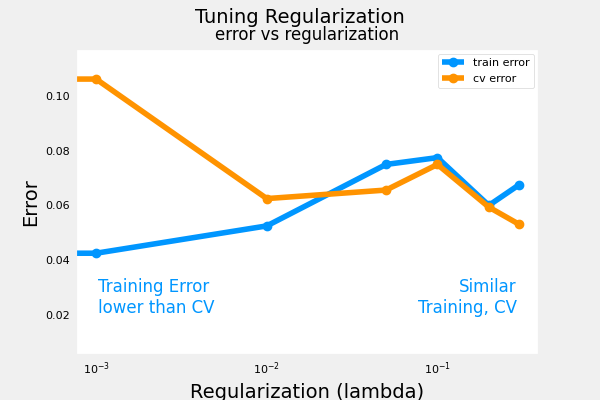

In [36]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 766us/step


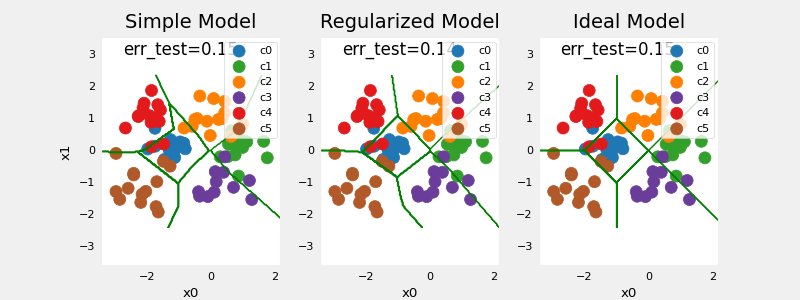

In [37]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)